# **The Global Trade of wild Animals**

## Introduction

The international trade of wild animals is a large and complex global activity. It supports many people’s livelihoods, especially in developing countries, but it also creates serious risks for biodiversity and species survival.  
To control these risks, the **Convention on International Trade in Endangered Species of Wild Fauna and Flora (CITES)** was created to regulate and monitor the trade of wildlife.  

This report focuses on the trade of **wild-sourced animals** — species taken directly from their natural habitats. Monitoring this type of trade is important because unregulated or excessive removal from the wild can cause population decline, habitat loss, and even extinction.  

By analyzing trade volumes, patterns, and the main countries involved, this study aims to identify key trends, evaluate potential risks, and provide practical insights that support sustainable and ethical wildlife trade management.


 ## Problem Statement
    
Despite international regulations under **CITES**, the trade of **wild-sourced animals** continues to exert substantial pressure on many species and ecosystems. However, there remains limited visibility into which species are most affected, which countries are driving the demand and supply, and how trade trends have evolved over time.  
    
This lack of clarity hinders effective policy enforcement and risk assessment, making it difficult to prioritize conservation efforts.  
    
Therefore, this project aims to **analyze CITES trade data** to identify trends, key species, and major trading countries involved in wild animal trade, evaluate the distribution of trade pressures, and highlight associated ethical and conservation concerns.


## Objectives

The main objectives of this project are to:

1. **Measure Trade Volumes and Trends**  
   Analyze the Number of transactions of wild-sourced animals over recent years to identify overall trends and fluctuations.

2. **Identify Key Species and Leading Countries**  
   Determine which species are most traded from the wild and which countries are the major exporters and importers.

3. **Monitor Distribution of Trade Pressures**  
   Assess how trade activity is distributed across species and their **origin countries**, by analyzing the number of transactions, and highlighting species and countries with the highest trade involvement.

4. **Conduct Risk Assessment**  
   Evaluate the potential risks of each wild-sourced animal transaction based on the **Purpose Code**, **CITES Appendix**, and sensitive specimen categories.  
   This assessment generates a risk score that reflects both the conservation concern of the species and the potential vulnerability in enforcement, highlighting transactions that may pose the highest threat to species survival and compliance with CITES regulations.


5. **Highlight Ethical Concerns**  
   Identify trade practices that may raise ethical or conservation issues, with a particular focus on **trophy hunting** and its impact on wild populations. This includes assessing transactions that involve high-risk species or purposes that are controversial from an ethical standpoint.

6. **Provide Practical Insights**  
   Offer actionable recommendations to support sustainable and ethical wildlife trade management.


## Target Audience

The primary target audience for this project includes:

1. **CITES Authorities**  
   The organization responsible for regulating and monitoring international wildlife trade, ensuring compliance with conventions.

2. **Policy Makers and Regulatory Authorities**  
   Government agencies and regulators tasked with enforcing wildlife trade laws and developing policies for sustainable management.

3. **Environmental and Ethical Advocacy Groups**  
   Organizations focused on the ethical and conservation aspects of wildlife trade, including concerns related to trophy hunting and the protection of sensitive species.


## Dataset(s)

The primary dataset for this analysis was obtained from the **CITES Trade Database**: [https://trade.cites.org/](https://trade.cites.org/).  

### Description
The dataset contains records of international wildlife trade transactions reported by CITES Parties. For this project, only **wild-sourced animals (Source = W)** were included, focusing on transactions from origin countries.  
Some records appeared with **Source = U (unspecified)**; these were treated as wild-sourced to ensure completeness in evaluating wild animal trade.  

In addition, the **Full Species List** was downloaded from [https://checklist.cites.org/#/en](https://checklist.cites.org/#/en) to extract the **English common names** corresponding to scientific names. This integration allows presenting results in both scientific and English names.

### Key Fields (Data Dictionary)
| Field Name                   | Description                                                      | Data Type       |
|-------------------------------|------------------------------------------------------------------|----------------|
| Year                          | Year of the reported transaction                                  | Integer        |
| App.                          | CITES Appendix classification (I, II, III)                        | String         |
| Taxon                         | Scientific name of the species                                     | String         |
| Class                         | Taxonomic class (e.g., Mammalia, Reptilia)                        | String         |
| Order                         | Taxonomic order                                                   | String         |
| Family                        | Taxonomic family                                                  | String         |
| Genus                         | Taxonomic genus                                                   | String         |
| Importer                      | Country importing the specimen                                     | String         |
| Exporter                      | Country exporting the specimen                                     | String         |
| Origin                        | Country of origin of the specimen                                   | String         |
| Importer reported quantity     | Quantity reported by the importer                                   | Integer/Float  |
| Exporter reported quantity     | Quantity reported by the exporter                                   | Integer/Float  |
| Term                          | Type of specimen or product traded                                 | String         |
| Unit                          | Unit of measurement (e.g., number, kg, pairs)                     | String         |
| Purpose                       | Purpose of the trade (Commercial, Trophy, Scientific, etc.)      | String         |
| Source                        | Source of the specimen (W = wild, C = captive-bred, U = unspecified, etc.) | String         |

### Notes
- Only records with **Source = W** and **Source = U** were included and treated as wild-sourced.  
- Quantities may represent individuals, parts, or derivatives; therefore, analysis focuses primarily on **number of transactions** and **origin countries** rather than absolute weight or volume.  
- Integration with the Full Species List allows translation of scientific names into **English common names** for easier interpretation.


# Data Handling

**The data cleaning process was performed in a separate Python Notebook, which will be attached along with this report.** 


### 1. Merging Multiple Files and Linking Species Names

- Due to the large size of the data, the dataset was initially downloaded in **three separate files**.  
- These files were **merged** into a single dataset to facilitate comprehensive analysis.  
- The **Full Species List** from [https://checklist.cites.org/#/en](https://checklist.cites.org/#/en) was integrated by **matching the Taxon (scientific name)**.  
- This process allowed extraction of **English common names** for each species, enabling results to be presented in both **scientific and English names*

After merging the trade files and linking the Full Species List, the following new columns were created:

| Column Name    | Description                                                      |
|----------------|------------------------------------------------------------------|
| FullName       | Full scientific name of the specimen                             |
| EnglishNames   | English common name corresponding to the scientific name         |
| CurrentListing | CITES Appendix or listing status (I, II, III)                    |

These new columns allow for:  
- Displaying species names in both **scientific and English formats**  
- Incorporating **CITES listing status** directly into the analysis  
- Facilitating clear categorization and reporting of trade patterns and conservation risks.
  
### 2. Handling Missing Data (Missing Values)

1. **Selection of Relevant Columns**  
   - Only columns necessary for the analysis were retained.  
   - Columns such as `Order`, `Family`, and `Genus` had many missing values and were **ignored**.  
   - `Class` was retained to categorize animals by taxonomic rank.

2. **Handling Missing Origin Values**  
   - The `Origin` column had **66,898 missing values**.  
   - According to the CITES data guide, this column is left blank if the exporting country is also the country of origin or if the origin is not reported.  
   - Missing `Origin` values were **replaced with the `Exporter` country** to maintain completeness for origin-based analysis.

3. **Handling Unit**  
   - The `Unit` column had **36,067 missing values**.  
   - According to the CITES data guide, when the `Unit` is blank, the quantity represents the **number of specimens**.  
   - However, the `Unit` and reported `Quantity` were **ignored** in this analysis due to several reasons:  
     1. **Inconsistency of units:** Even for the same species, quantities can be reported in different units—numbers of specimens, kilograms, or cubic meters.  
     2. **Variation in product types:** Transactions may involve live animals, animal parts, derivatives, textiles, or extracts, resulting in **heterogeneous data** that cannot be directly aggregated.  
     3. **Missing values and gaps:** Many records have missing or incomplete quantity information, making it unreliable to use absolute quantities.  

   - Therefore, the analysis focuses on the **number of transactions** and the **origin country** to provide a consistent and meaningful measure of trade activity.

4. **Handling Missing Purpose Values**  
   - The `Purpose` column had **1,570 missing values**.  
   - These were filled with `No Specified` to standardize the dataset and avoid null values in the analysis.

5. **Handling Missing Source Values**  
   - The `Source` column had **2,151 missing values**.  
   - These were treated as **wild-sourced (W)**, since they represent transactions with unspecified source, consistent with the focus on wild animals.

### 3. Handling CITES Listing (Appendix) Values

- During data exploration, some records had **N** in the `App.` column, indicating that the specimen is **not listed in any CITES Appendix**.  
- After linking the Full Species List and creating the `CurrentListing` column, missing or inconsistent listing values were **verified and updated**:  
  - If the species had a valid listing in the Full Species List, the `CurrentListing` value was filled accordingly.  
  - Species not listed under any Appendix remained **excluded** from Appendix-based analysis.  
- This ensures that all records in the analysis reflect **accurate CITES listing information** for assessing conservation and trade risks.


### 4. Transformation and Additional Columns

1. **Class_EN**  
   - Converted the scientific `Class` names into **English class names** for easier interpretation.

2. **Origin_EN**  
   - Converted country codes in the `Origin` column into **full country names** using the CITES Data Guide.

3. **Purpose_EN**  
   - Converted purpose codes into full English descriptions using the CITES Data Guide:  
     ```
     B: Breeding in captivity or artificial propagation
     E: Educational
     G: Botanical garden
     H: Hunting trophy
     L: Law enforcement/judicial/forensic
     M: Medical (including biomedical research)
     N: Reintroduction or introduction into the wild
     P: Personal
     Q: Circus or travelling exhibition
     S: Scientific
     T: Commercial
     Z: Zoo
     ```

4. **Source_EN**  
   - Converted source codes into full English descriptions.

5. **Protection_Level**  
   - Created based on the `CurrentListing` column.

6. **Term_Group**  
   - Transactions were categorized into broader groups to simplify analysis:  
     - Unspecified  
     - Raw Body Parts  
     - Manufactured Products  
     - Food Products  
     - Live Specimens  
     - Processed Materials

7. **SensitivityFlag**  
   - Indicates presence of sensitive products (e.g., ivory, rhino horns, trophies).

8. **EnforcementWeaknessBase**  
   - Calculated using the risk model **before** considering sensitive products.

9. **EnforcementWeaknessFinal**  
   - Calculated using the risk model **after** adding the `SensitivityFlag`.

10. **EnglishNames Completion and Standardization**  
    - Missing English names were retrieved from [ITIS](https://itis.gov/) and some names were adjusted for presentation purposes.


# Analysis

In [455]:
import pandas as pd

file_path = "CITES WILDLIFE TRADE.csv"
df = pd.read_csv(file_path)

print(df.head())


   Year App.                 Taxon     Class          Order         Family  \
0  2019    I  Haliaeetus albicilla      Aves  Falconiformes   Accipitridae   
1  2019    I        Harpia harpyja      Aves  Falconiformes   Accipitridae   
2  2019    I        Harpia harpyja      Aves  Falconiformes   Accipitridae   
3  2019    I        Harpia harpyja      Aves  Falconiformes   Accipitridae   
4  2019    I    Alligator sinensis  Reptilia     Crocodylia  Alligatoridae   

        Genus Importer Exporter Origin  ...  CurrentListing  SensitivityFlag  \
0  Haliaeetus       IS       DK     XX  ...               I    Not Sensitive   
1      Harpia       FR       CH     MO  ...               I    Not Sensitive   
2      Harpia       FR       CH     XX  ...               I    Not Sensitive   
3      Harpia       TT       SR     SR  ...               I    Not Sensitive   
4   Alligator       CH       SI     US  ...               I    Not Sensitive   

  EnforcementWeaknessBase EnforcementWeaknessFinal

## 1. Trade Volume

### 1.1 Total Number of Transactions 

In [456]:
total_transactions = len(df)
print(total_transactions)


112397


### 1.2 Number of transactions per year

In [457]:
transactions_per_year = df.groupby('Year').size().reset_index(name='Transaction_Count')
transactions_per_year


,Year,Transaction_Count
0,2019,26647
1,2020,21698
2,2021,22007
3,2022,22388
4,2023,19657


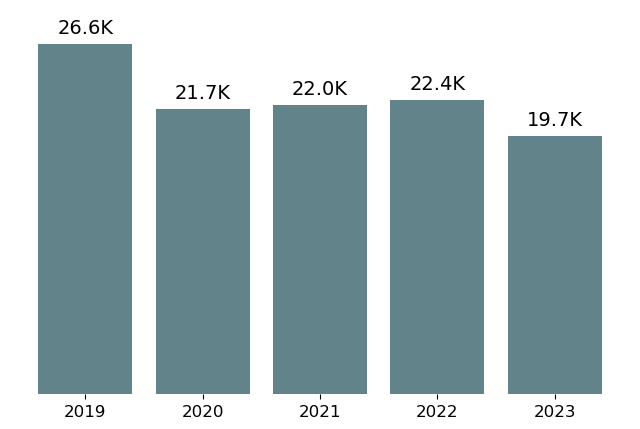

In [458]:
import matplotlib.pyplot as plt

transactions_per_year = df.groupby('Year')['Taxon'].count().reset_index(name='Transaction_Count')
transactions_per_year['Year'] = transactions_per_year['Year'].astype(int)

plt.figure(figsize=(8,5))
bars = plt.bar(transactions_per_year['Year'], transactions_per_year['Transaction_Count'], color='#618389')
plt.xticks(transactions_per_year['Year'], rotation=0, fontsize=12)

plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.gca().spines['bottom'].set_visible(False)
plt.gca().yaxis.set_visible(False)


plt.ylim(0, transactions_per_year['Transaction_Count'].max() * 1.1) 

offset = transactions_per_year['Transaction_Count'].max() * 0.02  
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + offset, f"{height/1000:.1f}K", 
             ha='center', va='bottom', fontsize=14)

plt.show()

### 1.3 Unique Taxon count per Class and total unique Taxon

In [459]:
taxon_per_class = df.groupby('Class_EN')['Taxon'].nunique().reset_index(name='Unique_Taxon_Count')
taxon_per_class = taxon_per_class.sort_values(by='Unique_Taxon_Count', ascending=False)
total_unique_taxon = df['Taxon'].nunique()

print(taxon_per_class)
print("Total unique Taxon:", total_unique_taxon)


             Class_EN  Unique_Taxon_Count
6              Corals                 863
2               Birds                 854
12            Mammals                 572
14           Reptiles                 470
16    Sharks and Rays                 100
0          Amphibians                  94
13  Ray-finned Fishes                  48
8            Hydroids                  45
9             Insects                  32
3            Bivalves                  13
1           Arachnids                  10
4         Cephalopods                   6
15      Sea Cucumbers                   5
7          Gastropods                   4
10            Leeches                   2
5         Coelacanths                   1
11         Lungfishes                   1
Total unique Taxon: 3120


### 1.4 Number of transactions per Specie (Top 10)

In [460]:
transaction_count = df.groupby(['EnglishNames', 'Threat_Status']).size().reset_index(name='Transaction_Count')
transaction_count = transaction_count.sort_values(by='Transaction_Count', ascending=False)
print(transaction_count.head(10))


                  EnglishNames Threat_Status  Transaction_Count
303         American alligator    Vulnerable               9339
437        Asian water monitor    Vulnerable               5208
436               Asian python    Vulnerable               4472
2159              Nile monitor    Vulnerable               2984
1720              Lama vicugna    Vulnerable               2022
680   Caiman crocodilus yacare    Vulnerable               1811
2158            Nile crocodile    Vulnerable               1651
302        American Black Bear    Vulnerable               1452
1727               Large Hippo    Vulnerable               1417
2881              Stony corals    Vulnerable               1410


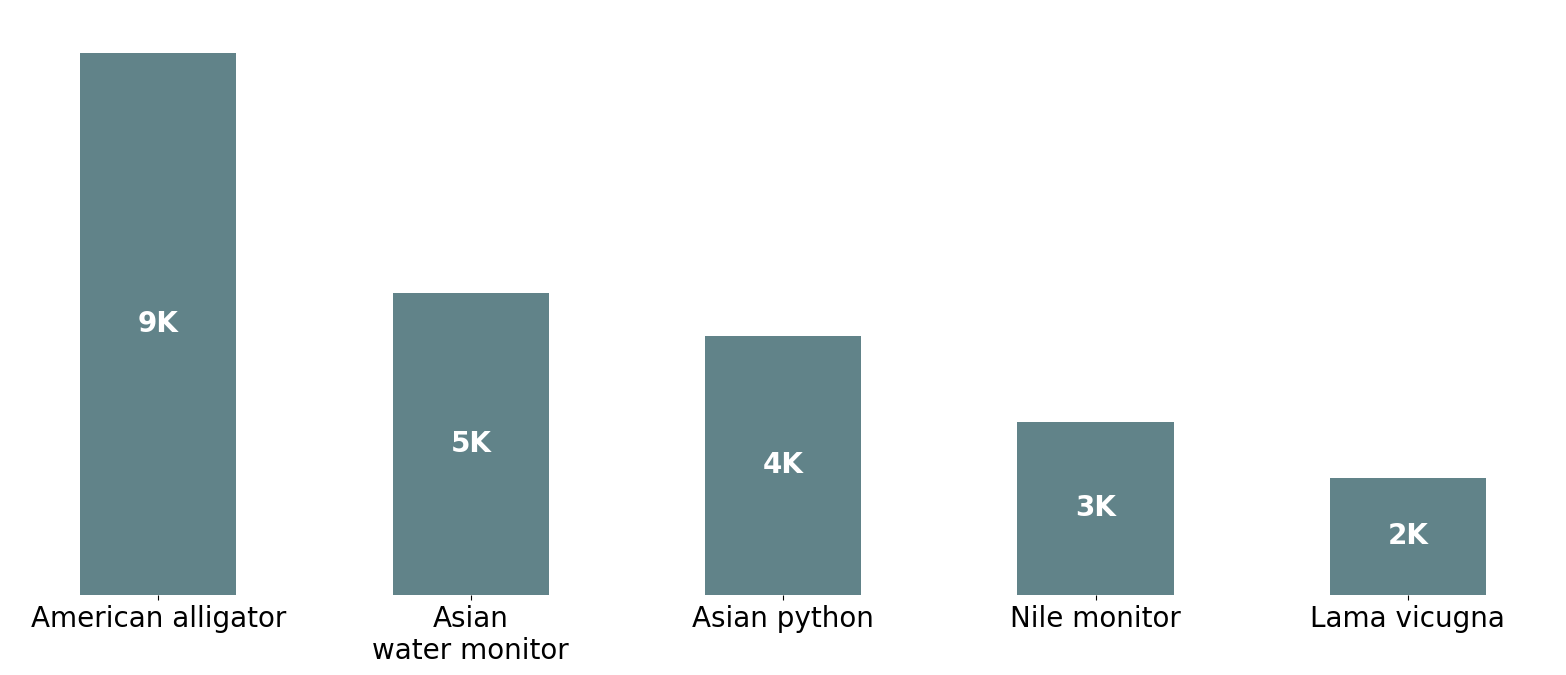

In [461]:
import matplotlib.pyplot as plt
import textwrap

top5_animals = transaction_count.head(5).sort_values(by='Transaction_Count', ascending=False)

plt.figure(figsize=(16, 7))

plt.rcParams.update({
    'font.size': 15,
    'axes.titlesize': 15,
    'axes.labelsize': 15,
    'xtick.labelsize': 15,
    'ytick.labelsize': 15
})

bars = plt.bar(top5_animals['EnglishNames'], top5_animals['Transaction_Count'], color='#618389', width=0.5)

wrapped_labels = []
for label in top5_animals['EnglishNames']:
    words = label.split()
    if len(words) > 2:
        midpoint = len(words)//2
        wrapped_label = ' '.join(words[:midpoint]) + '\n' + ' '.join(words[midpoint:])
    else:
        wrapped_label = label
    wrapped_labels.append(wrapped_label)

plt.xticks(range(len(wrapped_labels)), wrapped_labels, rotation=0, ha='center', fontsize=20)

plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.gca().spines['bottom'].set_visible(False)
plt.gca().yaxis.set_visible(False)

for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width()/2,
        height / 2,
        f"{height/1000:.0f}K",
        ha='center',
        va='center',
        fontsize=20,
        color='white',
        fontweight='bold'
    )

y_min = 0
y_max = top5_animals['Transaction_Count'].max() * 1.08
plt.ylim(y_min, y_max)

plt.tight_layout()
plt.show()


### 1.5 Number of transactions per Class

In [462]:
transactions_per_class = df.groupby('Class_EN').size().reset_index(name='Transaction_Count')
transactions_per_class = transactions_per_class.sort_values(by='Transaction_Count', ascending=False)
print(transactions_per_class)

             Class_EN  Transaction_Count
14           Reptiles              39007
6              Corals              31933
12            Mammals              29085
2               Birds               6269
16    Sharks and Rays               2291
7          Gastropods                776
13  Ray-finned Fishes                688
3            Bivalves                636
0          Amphibians                592
8            Hydroids                539
15      Sea Cucumbers                273
9             Insects                146
10            Leeches                 81
4         Cephalopods                 39
1           Arachnids                 36
11         Lungfishes                  4
5         Coelacanths                  2


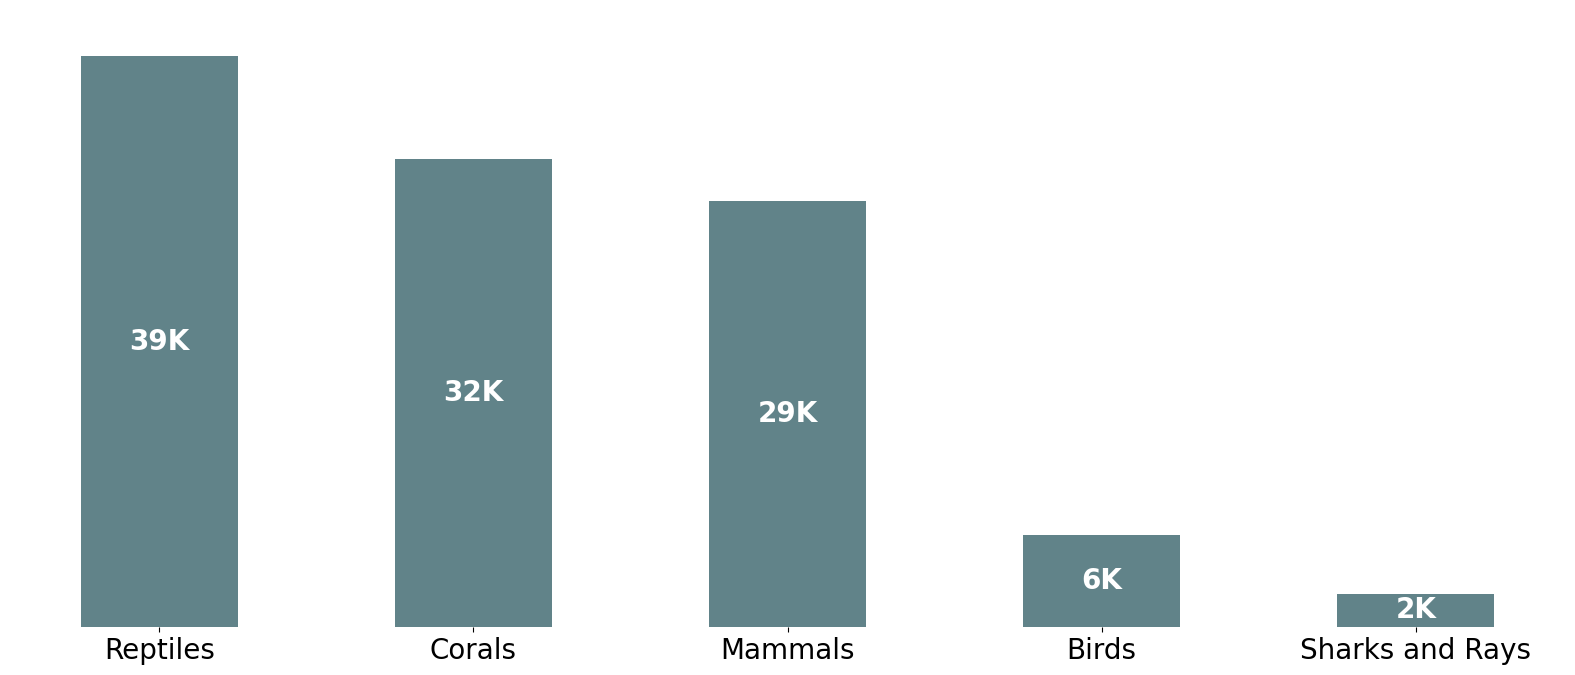

In [463]:
import matplotlib.pyplot as plt

top5_transactions = transactions_per_class.head(5).sort_values(by='Transaction_Count', ascending=False)

plt.figure(figsize=(16, 7))

plt.rcParams.update({
    'font.size': 15,
    'axes.titlesize': 15,
    'axes.labelsize': 15,
    'xtick.labelsize': 20,
    'ytick.labelsize': 15
})

bars = plt.bar(top5_transactions['Class_EN'], top5_transactions['Transaction_Count'], color='#618389', width=0.5)

plt.xticks(rotation=0, ha='center')

plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.gca().spines['bottom'].set_visible(False)
plt.gca().yaxis.set_visible(False)

for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width()/2,
        height / 2,
        f"{height/1000:.0f}K",
        ha='center',
        va='center',
        fontsize=20,
        color='white',
        fontweight='bold'
    )

y_min = 0
y_max = top5_transactions['Transaction_Count'].max() * 1.08
plt.ylim(y_min, y_max)

plt.tight_layout()
plt.show()


### 1.6 Total number of countries participating in the trade

In [464]:
participating_countries = pd.unique(df[['Importer', 'Exporter']].values.ravel())
total_participating_countries = len(participating_countries)

print("Total participating countries:", total_participating_countries)


Total participating countries: 242


## 2. Trade Leading coutries 

### 2.1 Top 5 Importer and Exporter countries by number of transactions

In [465]:
top5_importers = df['Importer_EN'].value_counts().head(5).reset_index()
top5_importers.columns = ['Country', 'Transaction_Count']

top5_exporters = df['Exporter_EN'].value_counts().head(5).reset_index()
top5_exporters.columns = ['Country', 'Transaction_Count']

print("Top 5 Importers:")
print(top5_importers)
print("\nTop 5 Exporters:")
print(top5_exporters)


Top 5 Importers:
         Country  Transaction_Count
0  United States              18376
1          Japan               5207
2      Hong Kong               4306
3        Germany               4050
4         France               3915

Top 5 Exporters:
        Country  Transaction_Count
0     Indonesia              13426
1     Australia              13337
2         Italy               8330
3  South Africa               7229
4        France               5719


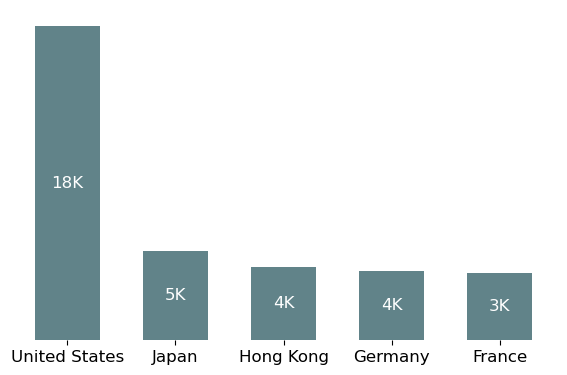

In [466]:
import matplotlib.pyplot as plt

top5_importers = df['Importer_EN'].value_counts().head(5).reset_index()
top5_importers.columns = ['Country', 'Transaction_Count']

plt.figure(figsize=(6,4))
bars = plt.bar(top5_importers['Country'], top5_importers['Transaction_Count'], color='#618389', width=0.6)
plt.xticks(rotation=0, ha='center', fontsize=12)

plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.gca().spines['bottom'].set_visible(False)
plt.gca().yaxis.set_visible(False)

for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width()/2,
        height / 2,
        f"{int(height/1000)}K",
        ha='center',
        va='center',
        fontsize=12,
        color='white'
    )

plt.tight_layout()
plt.show()


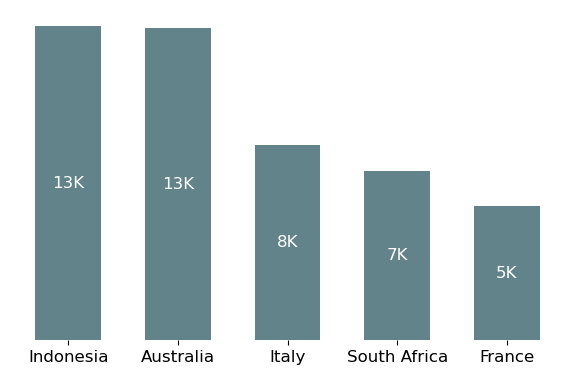

In [467]:
import matplotlib.pyplot as plt

top5_importers = df['Exporter_EN'].value_counts().head(5).reset_index()
top5_importers.columns = ['Country', 'Transaction_Count']

plt.figure(figsize=(6,4))
bars = plt.bar(top5_importers['Country'], top5_importers['Transaction_Count'], color='#618389', width=0.6)
plt.xticks(rotation=0, ha='center', fontsize=12)

plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.gca().spines['bottom'].set_visible(False)
plt.gca().yaxis.set_visible(False)

for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width()/2,
        height / 2,
        f"{int(height/1000)}K",
        ha='center',
        va='center',
        fontsize=12,
        color='white'
    )

plt.tight_layout()
plt.show()


## 3. Trade Purposes

In [468]:
top5_purposes_table = df['Purpose_EN'].value_counts().head(5).reset_index()
top5_purposes_table.columns = ['Purpose', 'Transaction_Count']
top5_purposes_table


,Purpose,Transaction_Count
0,Commercial,77291
1,Hunting trophy,14165
2,Scientific,8787
3,Personal,7543
4,Unspecified,1274


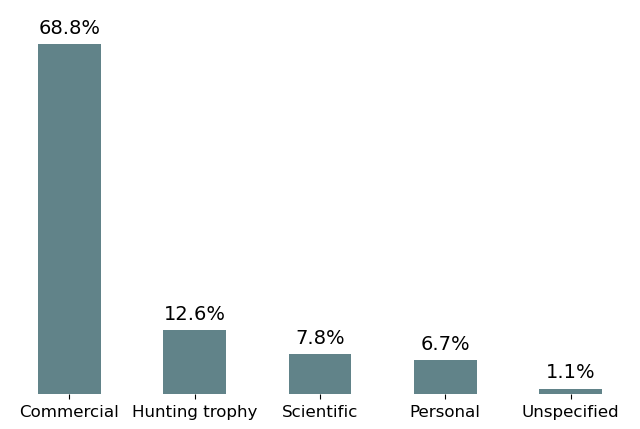

In [469]:
top5_purposes_table = df['Purpose_EN'].value_counts(normalize=True).head(5).reset_index()
top5_purposes_table.columns = ['Purpose', 'Percentage']
top5_purposes_table['Percentage'] *= 100

plt.figure(figsize=(8,5))
bars = plt.bar(top5_purposes_table['Purpose'], top5_purposes_table['Percentage'], color='#618389', width=0.5)
plt.xticks(rotation=0, ha='center', fontsize=12)

plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.gca().spines['bottom'].set_visible(False)
plt.gca().yaxis.set_visible(False)

offset = max(top5_purposes_table['Percentage']) * 0.02
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + offset, f"{height:.1f}%", ha='center', va='bottom', fontsize=14)

y_min = 0
y_max = top5_purposes_table['Percentage'].max() * 1.1
plt.ylim(y_min, y_max)

plt.show()


### 4. Threate Status

In [470]:
top_threat_status_table = df['Threat_Status'].value_counts().reset_index()
top_threat_status_table.columns = ['Threat_Status', 'Transaction_Count']
top_threat_status_table


,Threat_Status,Transaction_Count
0,Vulnerable,103738
1,Protected,4357
2,Endangered,4302


### 5. Trade Terms

In [471]:
term_group_table = df['Term_Group'].value_counts(normalize=True).reset_index()
term_group_table.columns = ['Term_Group', 'Percentage']
term_group_table['Percentage'] = (term_group_table['Percentage'] * 100).round(1)

markdown_table = term_group_table.to_markdown(index=False)
print(markdown_table)


| Term_Group            |   Percentage |
|:----------------------|-------------:|
| Manufactured Products |         36.8 |
| Live Specimens        |         33.5 |
| Raw Body Parts        |         21.5 |
| Unspecified           |          6.9 |
| Food Products         |          0.8 |
| Processed Materials   |          0.5 |


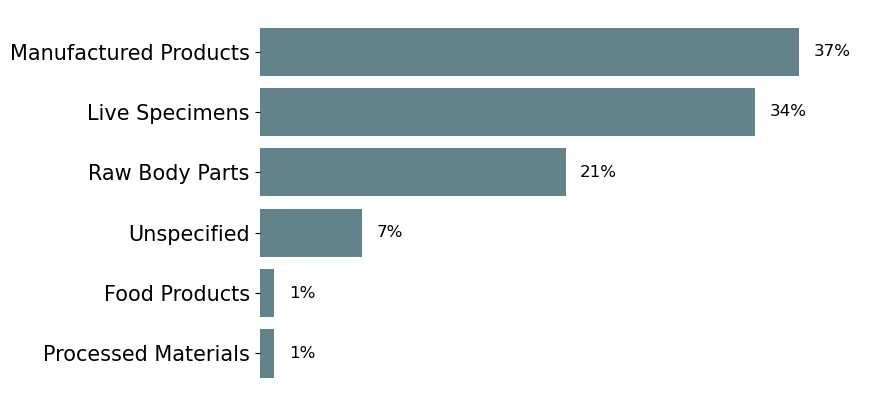

In [472]:
term_group_table = df['Term_Group'].value_counts(normalize=True).reset_index()
term_group_table.columns = ['Term_Group', 'Percentage']
term_group_table['Percentage'] = (term_group_table['Percentage'] * 100).round(0).astype(int)
term_group_table = term_group_table.sort_values('Percentage', ascending=False)

plt.figure(figsize=(8,5))
bars = plt.barh(term_group_table['Term_Group'], term_group_table['Percentage'], color='#618389')

plt.gca().invert_yaxis()
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.gca().spines['bottom'].set_visible(False)
plt.gca().xaxis.set_visible(False)

for bar in bars:
    width = bar.get_width()
    plt.text(width + 1, bar.get_y() + bar.get_height()/2, f"{width}%", va='center', fontsize=12)

x_max = term_group_table['Percentage'].max() * 1.15
plt.xlim(0, x_max)
plt.show()


### 6. Origin Countries

In [473]:
top5_origin_countries = (
    df.groupby('Origin_EN')
    .size()
    .reset_index(name='Transaction_Count')
    .sort_values('Transaction_Count', ascending=False)
    .head(5)
)
top5_origin_countries


,Origin_EN,Transaction_Count
93,Indonesia,20082
9,Australia,14185
208,United States,11667
181,South Africa,6320
34,Canada,4575


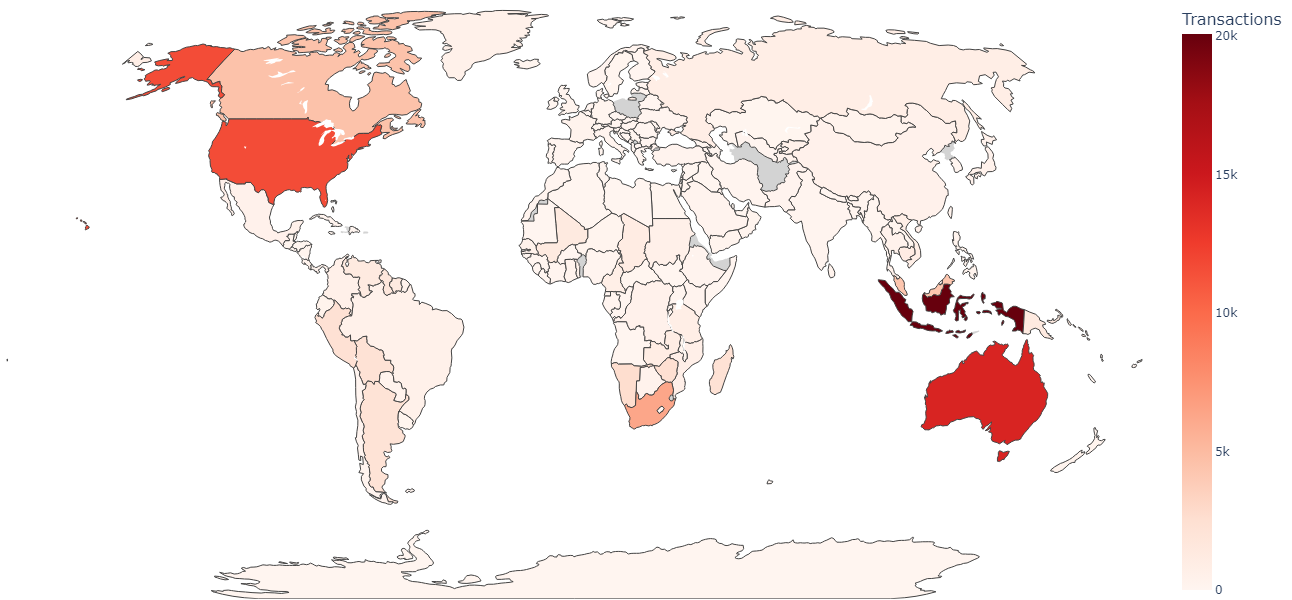

In [474]:
import pandas as pd
import plotly.express as px

origin_data = df.groupby('Origin_EN').size().reset_index(name='Transaction_Count')

fig = px.choropleth(
    origin_data,
    locations="Origin_EN",
    locationmode="country names",
    color="Transaction_Count",
    color_continuous_scale="Reds",
    hover_name="Origin_EN",
    projection="natural earth",
    width=1000,
    height=600
)

fig.update_layout(
    margin={"r":0,"t":0,"l":0,"b":0},
    geo=dict(
        showframe=False,
        showcoastlines=False,
        showland=True,
        landcolor="lightgray"
    ),
    coloraxis_colorbar=dict(
        title="Transactions",
        title_font=dict(size=16),
        tickfont=dict(size=12)
    )
)

fig.show()


## 7. Detailed Anlysis of the Top 3 classes

## 7.1 Replites

### 7.1.1 Top Origin countries

In [475]:
reptiles_df = df[df['Class_EN'] == 'Reptiles']

top5_origin_reptiles = reptiles_df.groupby('Origin_EN').size().reset_index(name='Transaction_Count')
top5_origin_reptiles = top5_origin_reptiles.sort_values(by='Transaction_Count', ascending=False).head(5)

print(top5_origin_reptiles)


         Origin_EN  Transaction_Count
138  United States               9624
57       Indonesia               8653
75        Malaysia               3415
73      Madagascar               1736
11         Bolivia               1674


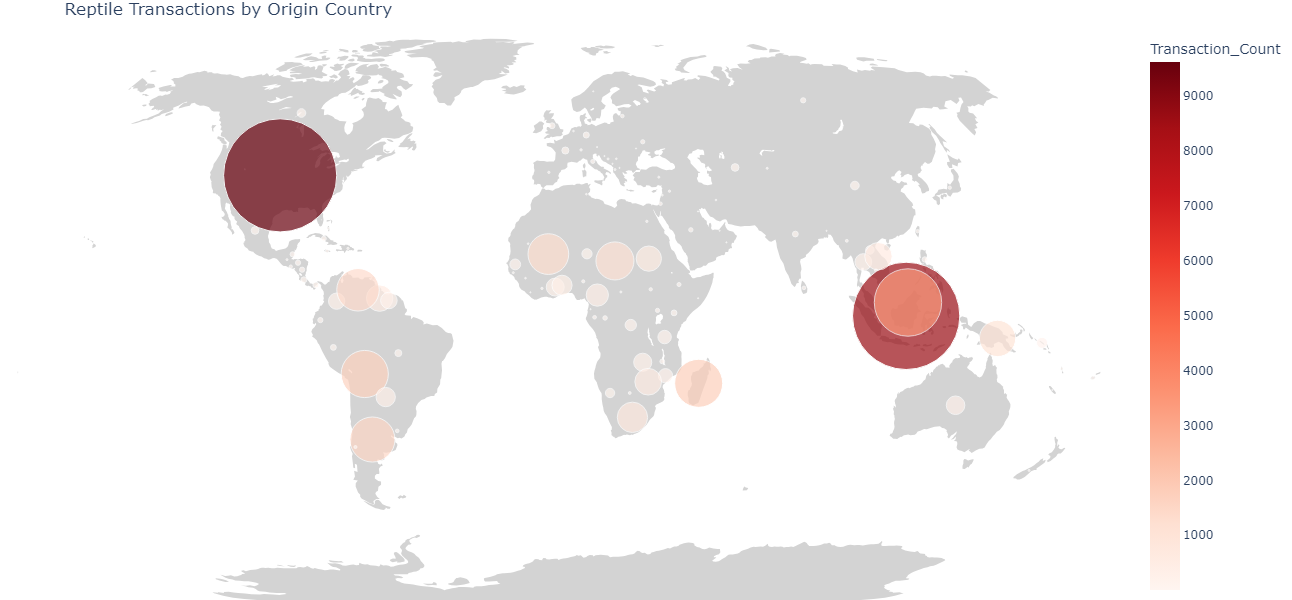

In [476]:
import plotly.express as px

top_origin_reptiles = reptiles_df.groupby('Origin_EN').size().reset_index(name='Transaction_Count')

fig = px.scatter_geo(
    top_origin_reptiles,
    locations="Origin_EN",
    locationmode='country names',
    size="Transaction_Count",
    hover_name="Origin_EN",
    projection="natural earth",
    color="Transaction_Count",
    color_continuous_scale='Reds',
    size_max=80,  
    width=900,    
    height=600   
)

fig.update_layout(
    title='Reptile Transactions by Origin Country',
    margin={"r":0,"t":30,"l":0,"b":0},
    geo=dict(
        showframe=False,
        showcoastlines=False,
        showland=True,
        landcolor="lightgray"
    )
)

fig.write_html("reptile_map_medium.html")
fig.show()


### 7.1.2 Top Traded Species

In [477]:
reptiles_df = df[df['Class_EN'] == 'Reptiles']

top5_reptiles = reptiles_df.groupby('EnglishNames').size().reset_index(name='Transaction_Count')
top5_reptiles = top5_reptiles.sort_values(by='Transaction_Count', ascending=False).head(5)

print(top5_reptiles)


                 EnglishNames  Transaction_Count
9          American alligator               9339
26        Asian water monitor               5208
25               Asian python               4472
297              Nile monitor               2984
71   Caiman crocodilus yacare               1811


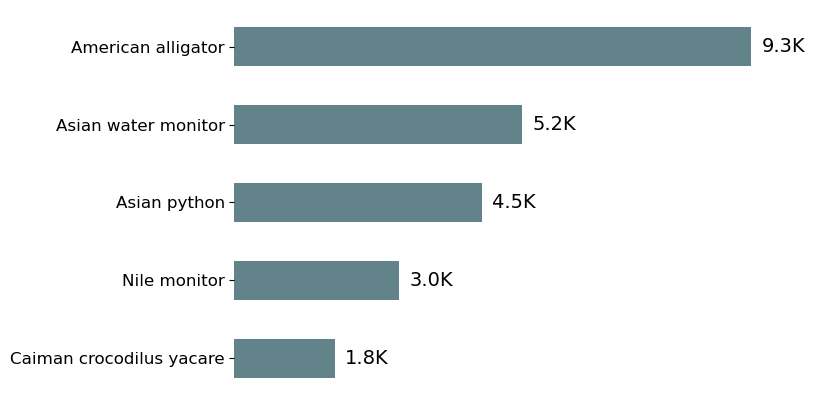

In [478]:
import matplotlib.pyplot as plt

plt.figure(figsize=(7,5))
bars = plt.barh(top5_reptiles['EnglishNames'], top5_reptiles['Transaction_Count'], color='#618389', height=0.5)
plt.yticks(rotation=0, fontsize=12)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.gca().spines['bottom'].set_visible(False)
plt.gca().xaxis.set_visible(False)

offset = max(top5_reptiles['Transaction_Count']) * 0.02
for i, bar in enumerate(bars):
    width = bar.get_width()
    plt.text(width + offset, bar.get_y() + bar.get_height()/2, f"{width/1000:.1f}K", va='center', fontsize=14)

plt.gca().invert_yaxis()  
plt.show()


### 7.1.3 Reptiles Threat Status

In [479]:
reptiles_df = df[df['Class_EN'] == 'Reptiles']

threat_counts = reptiles_df['Threat_Status'].value_counts().reset_index()
threat_counts.columns = ['Threat_Status', 'Count']
threat_counts['Percentage'] = (threat_counts['Count'] / threat_counts['Count'].sum() * 100).round(2)

print(threat_counts)


  Threat_Status  Count  Percentage
0    Vulnerable  38068       97.59
1    Endangered    509        1.30
2     Protected    430        1.10


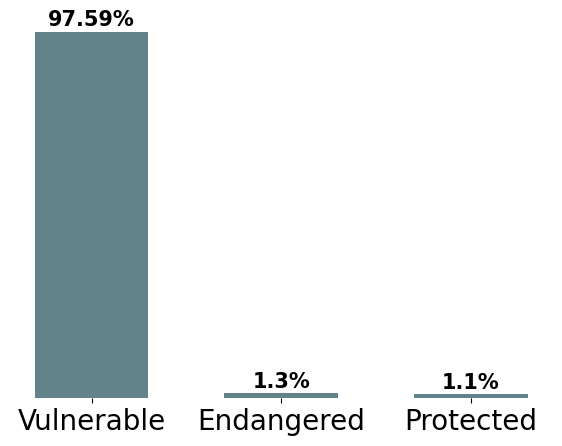

In [481]:
import matplotlib.pyplot as plt

plt.figure(figsize=(7,5))
bars = plt.bar(threat_counts['Threat_Status'], threat_counts['Percentage'], color='#618389', width=0.6)
plt.xticks(rotation=0, ha='center')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.gca().spines['bottom'].set_visible(False)
plt.gca().yaxis.set_visible(False)

for i, perc in enumerate(threat_counts['Percentage']):
    plt.text(i, perc + 0.5, f"{perc}%", ha='center', va='bottom', fontweight='bold')

plt.show()

### 7.1.4 Exporters & Importers (Top 5)

In [482]:
reptiles_df = df[df['Class_EN'] == 'Reptiles']

top5_exporters_reptiles = reptiles_df.groupby('Exporter_EN').size().reset_index(name='Transaction_Count')
top5_exporters_reptiles = top5_exporters_reptiles.sort_values(by='Transaction_Count', ascending=False).head(5)

top5_importers_reptiles = reptiles_df.groupby('Importer_EN').size().reset_index(name='Transaction_Count')
top5_importers_reptiles = top5_importers_reptiles.sort_values(by='Transaction_Count', ascending=False).head(5)

print("Top 5 Exporters:")
print(top5_exporters_reptiles)
print("\nTop 5 Importers:")
print(top5_importers_reptiles)


Top 5 Exporters:
       Exporter_EN  Transaction_Count
85           Italy               6334
60          France               4616
164    Switzerland               3999
80       Indonesia               2264
181  United States               1963

Top 5 Importers:
       Importer_EN  Transaction_Count
197  United States               5067
97           Japan               2312
179    Switzerland               1801
66          France               1756
85       Hong Kong               1657


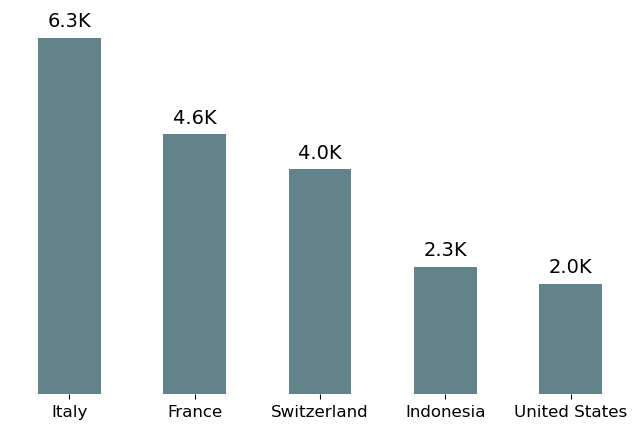

In [483]:
plt.figure(figsize=(8,5))
bars = plt.bar(top5_exporters_reptiles['Exporter_EN'], top5_exporters_reptiles['Transaction_Count'], color='#618389', width=0.5)
plt.xticks(rotation=0, ha='center', fontsize=12)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.gca().spines['bottom'].set_visible(False)
plt.gca().yaxis.set_visible(False)

offset = max(top5_exporters_reptiles['Transaction_Count']) * 0.02
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + offset, f"{height/1000:.1f}K", ha='center', va='bottom', fontsize=14)

y_min = 0
y_max = top5_exporters_reptiles['Transaction_Count'].max() * 1.08
plt.ylim(y_min, y_max)
plt.show()


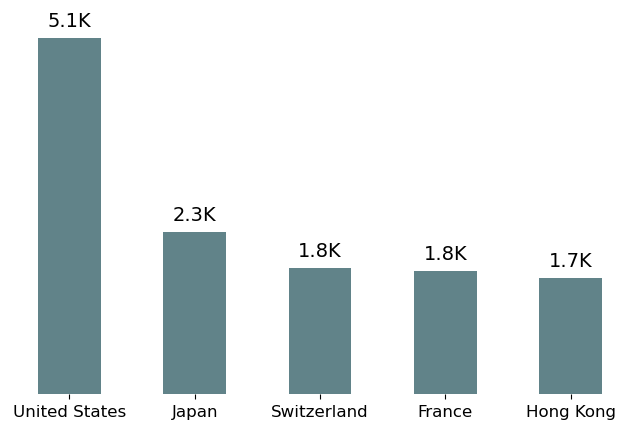

In [484]:
plt.figure(figsize=(8,5))
bars = plt.bar(top5_importers_reptiles['Importer_EN'], top5_importers_reptiles['Transaction_Count'], color='#618389', width=0.5)
plt.xticks(rotation=0, ha='center', fontsize=12)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.gca().spines['bottom'].set_visible(False)
plt.gca().yaxis.set_visible(False)

offset = max(top5_importers_reptiles['Transaction_Count']) * 0.02
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + offset, f"{height/1000:.1f}K", ha='center', va='bottom', fontsize=14)

y_min = 0
y_max = top5_importers_reptiles['Transaction_Count'].max() * 1.08
plt.ylim(y_min, y_max)
plt.show()


### 7.1.5 Reptiles Trade Purposes & Terms

In [485]:
reptiles = df[df['Class_EN'] == 'Reptiles']
top5_purpose = reptiles['Purpose_EN'].value_counts().head(5).reset_index()
top5_purpose.columns = ['Purpose_EN', 'Transaction_Count']

top5_term = reptiles['Term'].value_counts().head(5).reset_index()
top5_term.columns = ['Term', 'Transaction_Count']

print("Top 5 Purpose for Reptiles:")
print(top5_purpose)
print("\nTop 5 Terms for Reptiles:")
print(top5_term)


Top 5 Purpose for Reptiles:
       Purpose_EN  Transaction_Count
0      Commercial              33095
1        Personal               2644
2      Scientific               1105
3  Hunting trophy               1033
4         Medical                443

Top 5 Terms for Reptiles:
                       Term  Transaction_Count
0  leather products (small)              21756
1                      live               5894
2                     skins               3344
3                  garments               1539
4               skin pieces               1506


In [486]:
top5_purpose['Percentage'] = (top5_purpose['Transaction_Count'] / reptiles.shape[0]) * 100

top5_term['Percentage'] = (top5_term['Transaction_Count'] / reptiles.shape[0]) * 100

print("Top 5 Purpose for Reptiles with Percentage:")
print(top5_purpose)
print("\nTop 5 Terms for Reptiles with Percentage:")
print(top5_term)


Top 5 Purpose for Reptiles with Percentage:
       Purpose_EN  Transaction_Count  Percentage
0      Commercial              33095   84.843746
1        Personal               2644    6.778271
2      Scientific               1105    2.832825
3  Hunting trophy               1033    2.648243
4         Medical                443    1.135694

Top 5 Terms for Reptiles with Percentage:
                       Term  Transaction_Count  Percentage
0  leather products (small)              21756   55.774605
1                      live               5894   15.110108
2                     skins               3344    8.572820
3                  garments               1539    3.945446
4               skin pieces               1506    3.860845


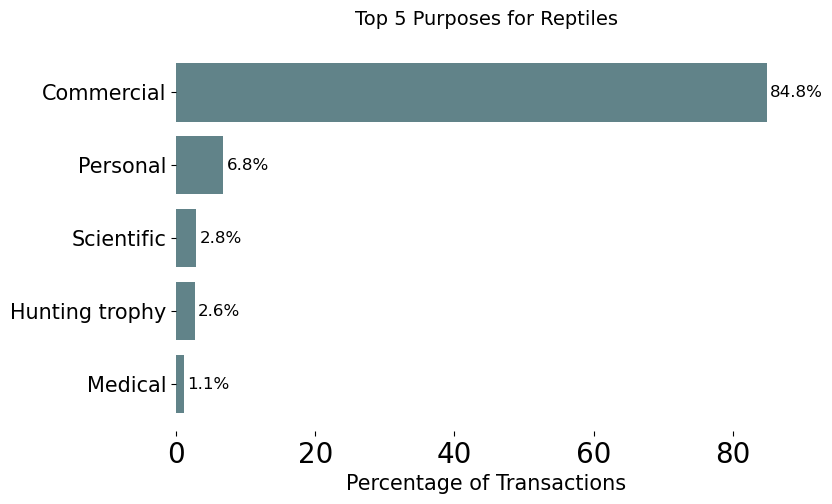

In [487]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
bars = plt.barh(top5_purpose['Purpose_EN'][::-1], top5_purpose['Percentage'][::-1], color='#618389')
for i, val in enumerate(top5_purpose['Percentage'][::-1]):
    plt.text(val + 0.5, i, f"{val:.1f}%", va='center', fontsize=12)
plt.xlabel("Percentage of Transactions")
plt.title("Top 5 Purposes for Reptiles", fontsize=14, pad=15)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.gca().spines['bottom'].set_visible(False)
plt.show()

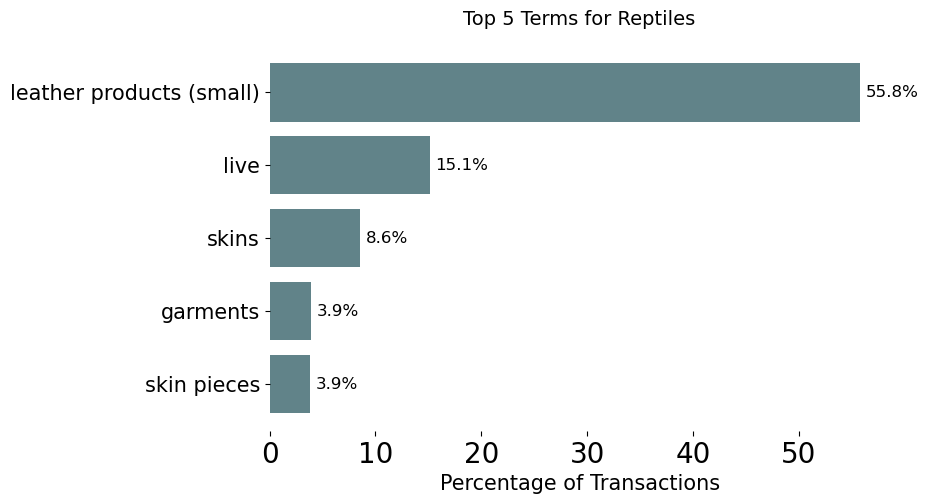

In [488]:
plt.figure(figsize=(8,5))
bars = plt.barh(top5_term['Term'][::-1], top5_term['Percentage'][::-1], color='#618389')
for i, val in enumerate(top5_term['Percentage'][::-1]):
    plt.text(val + 0.5, i, f"{val:.1f}%", va='center', fontsize=12)
plt.xlabel("Percentage of Transactions")
plt.title("Top 5 Terms for Reptiles", fontsize=14, pad=15)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.gca().spines['bottom'].set_visible(False)
plt.show()

## 7.2 Corals

In [489]:
corals_df = df[df['Class_EN'] == 'Corals']

### 7.2.1 Origin countries

In [490]:
top5_origin_corals = corals_df.groupby('Origin_EN').size().reset_index(name='Transaction_Count')
top5_origin_corals = top5_origin_corals.sort_values(by='Transaction_Count', ascending=False).head(5)
print(top5_origin_corals)


    Origin_EN  Transaction_Count
3   Australia              13451
39  Indonesia              10615
89      Tonga               2529
11   Cambodia                787
48   Malaysia                760


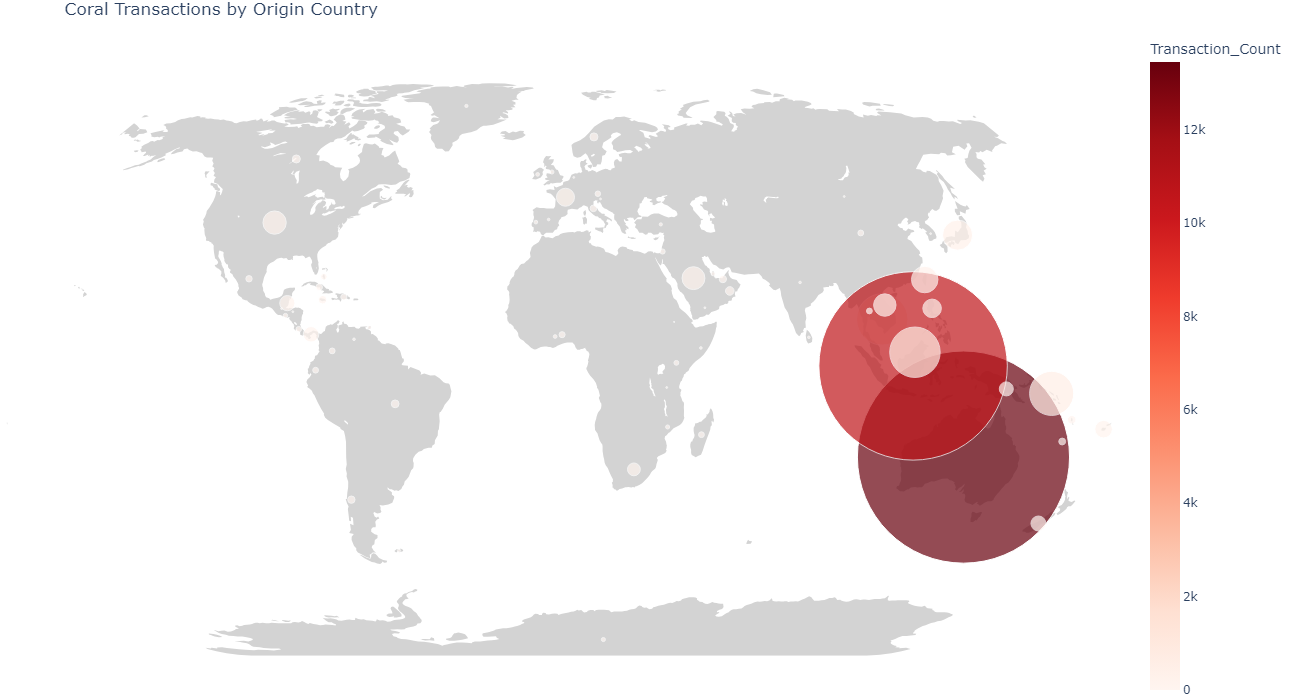

In [491]:
import plotly.express as px

top_origin_corals = corals_df.groupby('Origin_EN').size().reset_index(name='Transaction_Count')

fig = px.scatter_geo(
    top_origin_corals,
    locations="Origin_EN",
    locationmode='country names',
    size="Transaction_Count",
    hover_name="Origin_EN",
    projection="natural earth",
    color="Transaction_Count",
    color_continuous_scale='Reds',
    size_max=150,
    width=1200,
    height=700
)

fig.update_layout(
    title='Coral Transactions by Origin Country',
    margin={"r":0,"t":30,"l":0,"b":0},
    geo=dict(
        showframe=False,
        showcoastlines=False,
        showland=True,
        landcolor="lightgray"
    )
)

fig.write_html("coral_map_large.html")
fig.show()


### 7.2.2 Threat Status

In [492]:
threat_counts = corals_df.groupby('Threat_Status').size().reset_index(name='Transaction_Count')
threat_counts['Percentage'] = (threat_counts['Transaction_Count'] / threat_counts['Transaction_Count'].sum() * 100).round(1)
print(threat_counts)

  Threat_Status  Transaction_Count  Percentage
0     Protected                555         1.7
1    Vulnerable              31378        98.3


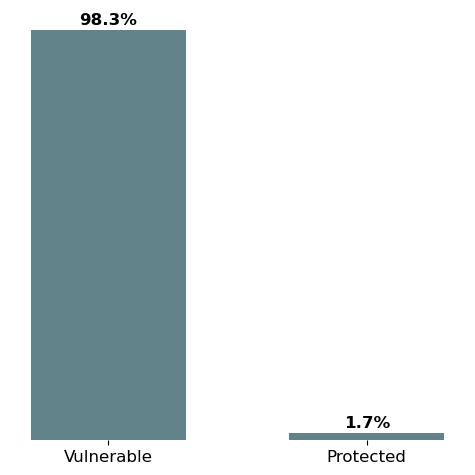

In [493]:
import matplotlib.pyplot as plt
import numpy as np

threat_counts_sorted = threat_counts.sort_values(by='Percentage', ascending=False)

n = len(threat_counts_sorted)
width = 0.003 
spacing = 0.002  

x = np.arange(n) * (width + spacing)

plt.figure(figsize=(5,5))
bars = plt.bar(x, threat_counts_sorted['Percentage'], color='#618389', width=width)

plt.xticks(x, threat_counts_sorted['Threat_Status'], rotation=0, ha='center', fontsize=12)
plt.gca().spines[['top','right','left','bottom']].set_visible(False)
plt.gca().yaxis.set_visible(False)

for i, perc in enumerate(threat_counts_sorted['Percentage']):
    plt.text(x[i], perc + 0.5, f"{perc}%", ha='center', va='bottom', fontweight='bold', fontsize=12)

plt.tight_layout()
plt.show()


### 7.2.3 Importers & Exporters (Top 5)

In [494]:
top5_exporters_corals = corals_df.groupby('Exporter_EN').size().reset_index(name='Transaction_Count')
top5_exporters_corals = top5_exporters_corals.sort_values(by='Transaction_Count', ascending=False).head(5)
print(top5_exporters_corals)


      Exporter_EN  Transaction_Count
1       Australia              12551
39      Indonesia              10446
89          Tonga               2007
95  United States               1284
98        Vietnam                965


In [495]:
top5_importers_corals = corals_df.groupby('Importer_EN').size().reset_index(name='Transaction_Count')
top5_importers_corals = top5_importers_corals.sort_values(by='Transaction_Count', ascending=False).head(5)
print(top5_importers_corals)


      Importer_EN  Transaction_Count
95  United States               5387
42          Japan               1855
82    South Korea               1569
31      Hong Kong               1229
26        Germany               1121


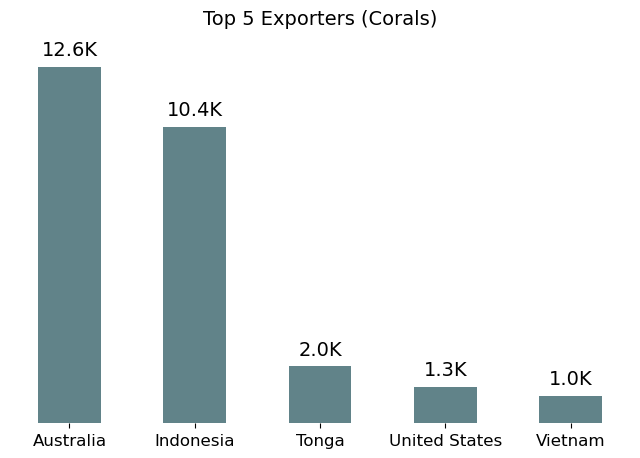

In [496]:
plt.figure(figsize=(8,5))
bars = plt.bar(top5_exporters_corals['Exporter_EN'], top5_exporters_corals['Transaction_Count'], color='#618389', width=0.5)
plt.xticks(rotation=0, ha='center', fontsize=12)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.gca().spines['bottom'].set_visible(False)
plt.gca().yaxis.set_visible(False)
offset = max(top5_exporters_corals['Transaction_Count']) * 0.02
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + offset, f"{height/1000:.1f}K", ha='center', va='bottom', fontsize=14)
plt.ylim(0, top5_exporters_corals['Transaction_Count'].max() * 1.08)
plt.title("Top 5 Exporters (Corals)", fontsize=14, pad=10)
plt.show()


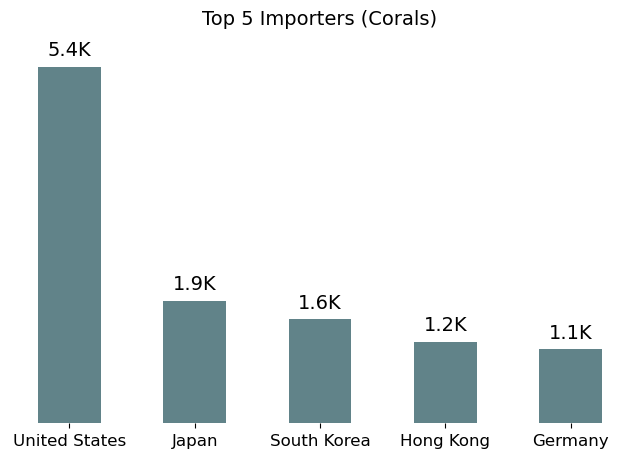

In [497]:
plt.figure(figsize=(8,5))
bars = plt.bar(top5_importers_corals['Importer_EN'], top5_importers_corals['Transaction_Count'], color='#618389', width=0.5)
plt.xticks(rotation=0, ha='center', fontsize=12)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.gca().spines['bottom'].set_visible(False)
plt.gca().yaxis.set_visible(False)
offset = max(top5_importers_corals['Transaction_Count']) * 0.02
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + offset, f"{height/1000:.1f}K", ha='center', va='bottom', fontsize=14)
plt.ylim(0, top5_importers_corals['Transaction_Count'].max() * 1.08)
plt.title("Top 5 Importers (Corals)", fontsize=14, pad=10)
plt.show()


### 7.2.4 Corals Trade Purposes & Terms 

In [498]:
corals_df = df[df['Class_EN'] == 'Corals']

top5_purpose_corals = (
    corals_df['Purpose_EN']
    .value_counts(normalize=True)
    .head(5) * 100
).reset_index()
top5_purpose_corals.columns = ['Purpose_EN', 'Percentage']

top5_purpose_corals


,Purpose_EN,Percentage
0,Commercial,91.241036
1,Scientific,7.099239
2,Unspecified,0.648232
3,Personal,0.616917
4,Zoo,0.200420


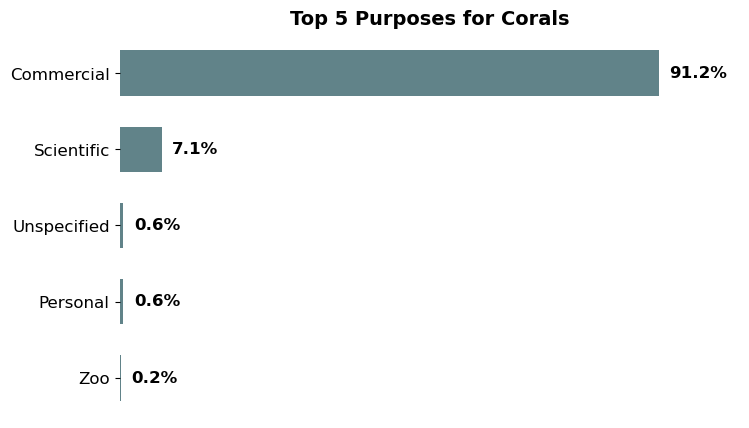

In [499]:
top5_purpose_corals = top5_purpose_corals.sort_values(by='Percentage', ascending=True)

plt.figure(figsize=(8,5))
bars = plt.barh(top5_purpose_corals['Purpose_EN'], top5_purpose_corals['Percentage'], color='#618389', height=0.6)
plt.yticks(fontsize=12)
plt.gca().spines[['top','right','left','bottom']].set_visible(False)
plt.gca().xaxis.set_visible(False)

offset = max(top5_purpose_corals['Percentage']) * 0.02
for bar in bars:
    width = bar.get_width()
    plt.text(width + offset, bar.get_y() + bar.get_height()/2, f"{width:.1f}%", va='center', fontsize=12, fontweight='bold')

plt.xlim(0, max(top5_purpose_corals['Percentage']) * 1.15)
plt.title("Top 5 Purposes for Corals", fontsize=14, fontweight='bold')
plt.show()


In [500]:
top5_terms_corals = (
    corals_df['Term']
    .value_counts(normalize=True)
    .head(5) * 100
).reset_index()
top5_terms_corals.columns = ['Term', 'Percentage']

top5_terms_corals


,Term,Percentage
0,live,77.643817
1,raw corals,16.077412
2,specimens,4.731782
3,jewellery,0.845520
4,carvings,0.488523


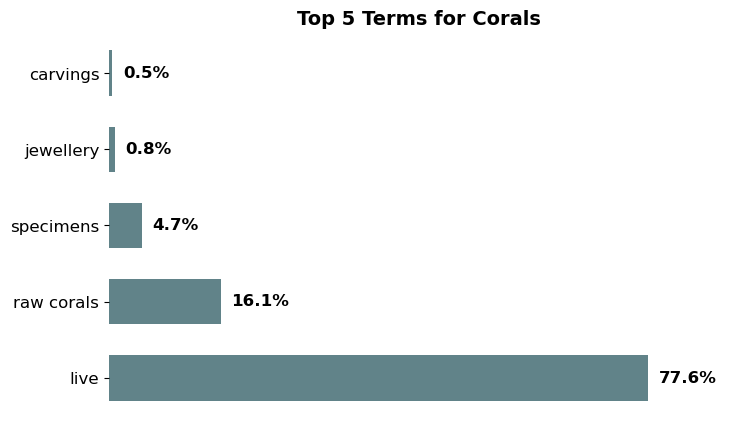

In [501]:
plt.figure(figsize=(8,5))
bars = plt.barh(top5_terms_corals['Term'], top5_terms_corals['Percentage'], color='#618389', height=0.6)
plt.yticks(fontsize=12)
plt.gca().spines[['top','right','left','bottom']].set_visible(False)
plt.gca().xaxis.set_visible(False)

offset = max(top5_terms_corals['Percentage']) * 0.02
for bar in bars:
    width = bar.get_width()
    plt.text(width + offset, bar.get_y() + bar.get_height()/2, f"{width:.1f}%", va='center', fontsize=12, fontweight='bold')

plt.xlim(0, max(top5_terms_corals['Percentage']) * 1.15)
plt.title("Top 5 Terms for Corals", fontsize=14, fontweight='bold')
plt.show()


### 7.2.5 Top Traded Coral Species

In [502]:
corals_df = df[df['Class_EN'] == 'Corals']

top5_corals = corals_df.groupby('EnglishNames').size().reset_index(name='Transaction_Count')
top5_corals = top5_corals.sort_values(by='Transaction_Count', ascending=False).head(5)

print(top5_corals)


        EnglishNames  Transaction_Count
801     Stony corals               1410
403  Flowerpot coral                760
821      Table coral                710
824      Torch coral                643
612   Mushroom coral                580


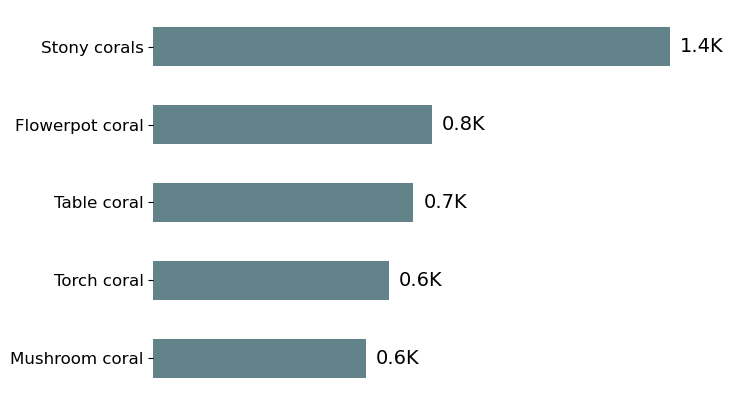

In [503]:
import matplotlib.pyplot as plt

plt.figure(figsize=(7,5))
bars = plt.barh(top5_corals['EnglishNames'], top5_corals['Transaction_Count'], color='#618389', height=0.5)
plt.yticks(rotation=0, fontsize=12)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.gca().spines['bottom'].set_visible(False)
plt.gca().xaxis.set_visible(False)

offset = max(top5_corals['Transaction_Count']) * 0.02
for i, bar in enumerate(bars):
    width = bar.get_width()
    plt.text(width + offset, bar.get_y() + bar.get_height()/2, f"{width/1000:.1f}K", va='center', fontsize=14)

plt.gca().invert_yaxis()
plt.show()


In [504]:

top5_origin_corals = corals_df.groupby('Origin_EN').size().reset_index(name='Transaction_Count')

top5_origin_corals = top5_origin_corals.sort_values(by='Transaction_Count', ascending=False).head(5)

print(top5_origin_corals)


    Origin_EN  Transaction_Count
3   Australia              13451
39  Indonesia              10615
89      Tonga               2529
11   Cambodia                787
48   Malaysia                760


## 7.3  Mammals

### 7.3.1 Top 5 Mammals 

In [505]:
import matplotlib.pyplot as plt

mammals_df = df[df['Class_EN'] == 'Mammals']

top5_mammals_names = mammals_df.groupby('EnglishNames').size().reset_index(name='Transaction_Count')
top5_mammals_names = top5_mammals_names.sort_values(by='Transaction_Count', ascending=False).head(5)

print(top5_mammals_names)



            EnglishNames  Transaction_Count
265         Lama vicugna               2029
2       African Elephant               1684
19   American Black Bear               1452
266          Large Hippo               1417
224              Giraffe               1366


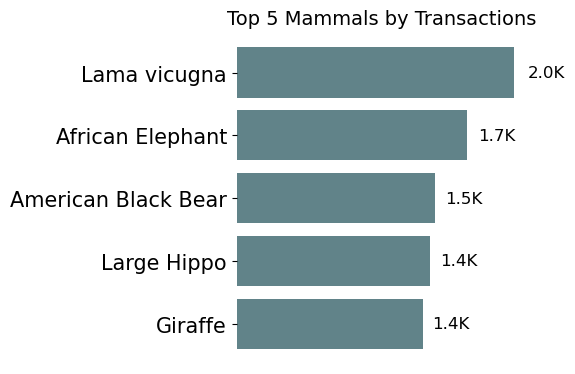

In [506]:

plt.figure(figsize=(6,4))
bars = plt.barh(
    top5_mammals_names['EnglishNames'],
    top5_mammals_names['Transaction_Count'],
    color='#618389'
)
plt.gca().invert_yaxis()
plt.gca().spines[['top','right','left','bottom']].set_visible(False)
plt.gca().xaxis.set_visible(False)

for i, v in enumerate(top5_mammals_names['Transaction_Count']):
    plt.text(v + v*0.05, i, f"{v/1000:.1f}K", va='center', fontsize=12)  

plt.title("Top 5 Mammals by Transactions", fontsize=14)
plt.tight_layout()
plt.show()


### 7.3.2 Top Origin countries

In [507]:
import plotly.express as px

mammals_df = df[df['Class_EN'] == 'Mammals']

top5_origin_mammals = mammals_df.groupby('Origin_EN').size().reset_index(name='Transaction_Count')
top5_origin_mammals = top5_origin_mammals.sort_values(by='Transaction_Count', ascending=False).head(5)

print(top5_origin_mammals)

        Origin_EN  Transaction_Count
143  South Africa               5126
27         Canada               4301
106       Namibia               2525
177      Zimbabwe               1963
123          Peru               1940


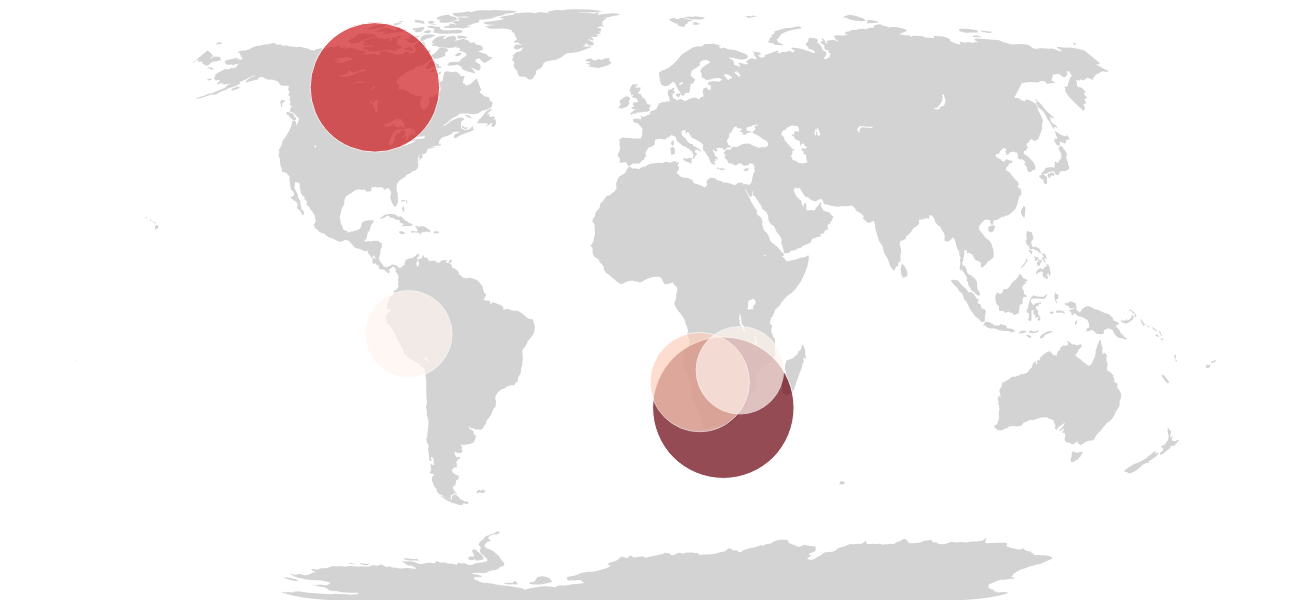

In [508]:
fig = px.scatter_geo(
    top5_origin_mammals,
    locations="Origin_EN",
    locationmode='country names',
    size="Transaction_Count",
    hover_name="Origin_EN",
    projection="natural earth",
    color="Transaction_Count",
    color_continuous_scale='Reds',
    size_max=100,
    width=1000,
    height=600
)

fig.update_layout(
    margin={"r":0,"t":0,"l":0,"b":0},
    legend=dict(
        title=None,
        orientation="h",
        yanchor="bottom",
        y=1.02,
        xanchor="center",
        x=0.5,
        font=dict(size=16, family='Arial', color='black')
    ),
    geo=dict(
        showframe=False,
        showcoastlines=False,
        showland=True,
        landcolor="lightgray"
    )
)

fig.update_traces(showlegend=False, marker=dict(sizemode='area'))
fig.update_coloraxes(showscale=False)

fig.show()


### 7.3.3 Mammals Threat Status

In [509]:
threat_counts = mammals_df.groupby('Threat_Status').size().reset_index(name='Transaction_Count')
threat_counts['Percentage'] = (threat_counts['Transaction_Count'] / threat_counts['Transaction_Count'].sum() * 100).round(1)
threat_counts.sort_values(by='Percentage', ascending=False, inplace=True)
print(threat_counts)


  Threat_Status  Transaction_Count  Percentage
2    Vulnerable              23339        80.2
0    Endangered               3052        10.5
1     Protected               2694         9.3


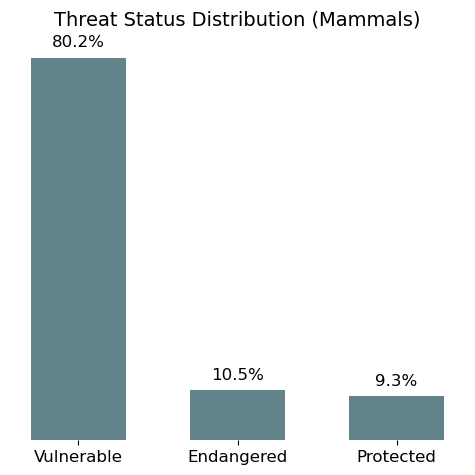

In [510]:
import matplotlib.pyplot as plt

threat_counts = mammals_df.groupby('Threat_Status').size().reset_index(name='Transaction_Count')
threat_counts['Percentage'] = threat_counts['Transaction_Count'] / threat_counts['Transaction_Count'].sum() * 100
threat_counts_sorted = threat_counts.sort_values(by='Percentage', ascending=False)

plt.figure(figsize=(5,5))
bars = plt.bar(
    threat_counts_sorted['Threat_Status'],
    threat_counts_sorted['Percentage'],
    color='#618389',
    width=0.6
)
plt.xticks(rotation=0, ha='center', fontsize=12)
plt.gca().spines[['top','right','left','bottom']].set_visible(False)
plt.gca().yaxis.set_visible(False)

offset = max(threat_counts_sorted['Percentage']) * 0.02
for i, perc in enumerate(threat_counts_sorted['Percentage']):
    plt.text(i, perc + offset, f"{perc:.1f}%", ha='center', va='bottom', fontsize=12)

plt.title("Threat Status Distribution (Mammals)", fontsize=14, pad=10)
plt.tight_layout()
plt.show()


### 7.3.4 Exporters & Importers (Top 5)

In [511]:
top5_exporters = mammals_df.groupby('Exporter_EN').size().reset_index(name='Transaction_Count')
top5_exporters = top5_exporters.sort_values(by='Transaction_Count', ascending=False).head(5)
print(top5_exporters)


      Exporter_EN  Transaction_Count
152  South Africa               5967
29         Canada               4114
112       Namibia               2423
82          Italy               1708
185      Zimbabwe               1542


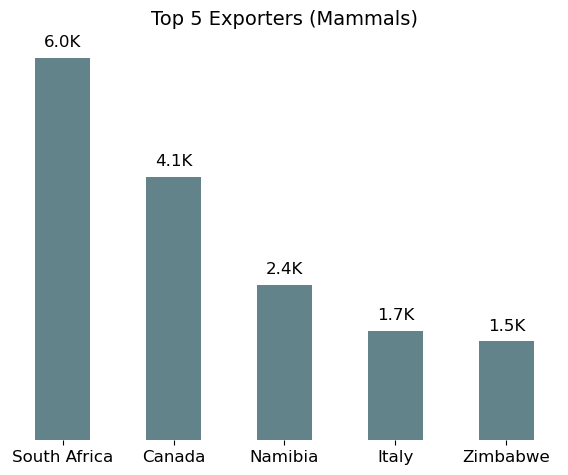

In [512]:
import matplotlib.pyplot as plt

top5_exporters = mammals_df.groupby('Exporter_EN').size().reset_index(name='Transaction_Count')
top5_exporters = top5_exporters.sort_values(by='Transaction_Count', ascending=False).head(5)

plt.figure(figsize=(6,5))
bars = plt.bar(
    top5_exporters['Exporter_EN'],
    top5_exporters['Transaction_Count'],
    color='#618389',
    width=0.5
)
plt.xticks(rotation=0, ha='center', fontsize=12)
plt.gca().spines[['top','right','left','bottom']].set_visible(False)
plt.gca().yaxis.set_visible(False)

offset = max(top5_exporters['Transaction_Count']) * 0.02
for i, val in enumerate(top5_exporters['Transaction_Count']):
    plt.text(i, val + offset, f"{val/1000:.1f}K", ha='center', va='bottom', fontsize=12)

plt.title("Top 5 Exporters (Mammals)", fontsize=14, pad=10)
plt.tight_layout()
plt.show()


In [513]:
top5_importers = mammals_df.groupby('Importer_EN').size().reset_index(name='Transaction_Count')
top5_importers = top5_importers.sort_values(by='Transaction_Count', ascending=False).head(5)
print(top5_importers)


       Importer_EN  Transaction_Count
166  United States               5766
58         Germany               1715
33           China               1357
54          France               1003
30          Canada                985


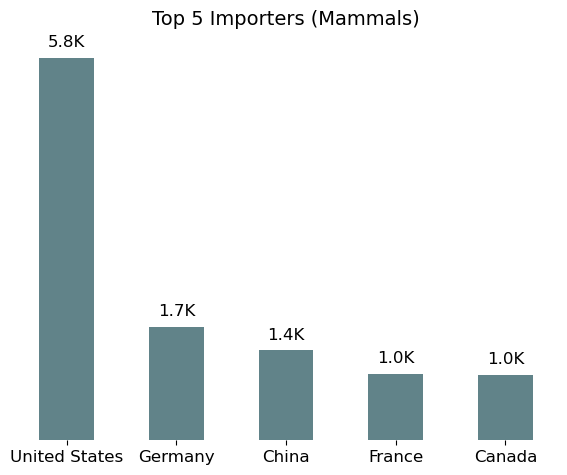

In [514]:
import matplotlib.pyplot as plt

top5_importers = mammals_df.groupby('Importer_EN').size().reset_index(name='Transaction_Count')
top5_importers = top5_importers.sort_values(by='Transaction_Count', ascending=False).head(5)

plt.figure(figsize=(6,5))
bars = plt.bar(
    top5_importers['Importer_EN'],
    top5_importers['Transaction_Count'],
    color='#618389',
    width=0.5
)
plt.xticks(rotation=0, ha='center', fontsize=12)
plt.gca().spines[['top','right','left','bottom']].set_visible(False)
plt.gca().yaxis.set_visible(False)

offset = max(top5_importers['Transaction_Count']) * 0.02
for i, val in enumerate(top5_importers['Transaction_Count']):
    plt.text(i, val + offset, f"{val/1000:.1f}K", ha='center', va='bottom', fontsize=12)

plt.title("Top 5 Importers (Mammals)", fontsize=14, pad=10)
plt.tight_layout()
plt.show()


### 7.3.5 Mammals Trade Purposes and Terms

In [515]:
import matplotlib.pyplot as plt

top5_purpose = mammals_df.groupby('Purpose_EN').size().reset_index(name='Transaction_Count')
top5_purpose = top5_purpose.sort_values(by='Transaction_Count', ascending=False).head(5)
print(top5_purpose)



        Purpose_EN  Transaction_Count
5   Hunting trophy              12988
3       Commercial               7917
8         Personal               3414
10      Scientific               3014
11     Unspecified                349


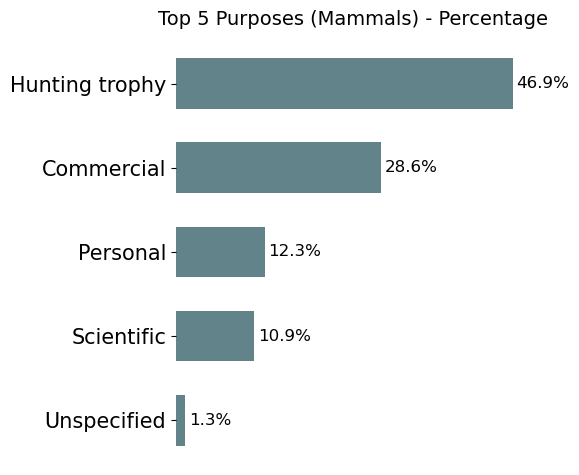

In [516]:
import matplotlib.pyplot as plt

top5_purpose = mammals_df.groupby('Purpose_EN').size().reset_index(name='Transaction_Count')
top5_purpose = top5_purpose.sort_values(by='Transaction_Count', ascending=False).head(5)
top5_purpose['Percentage'] = top5_purpose['Transaction_Count'] / top5_purpose['Transaction_Count'].sum() * 100

plt.figure(figsize=(6,5))
bars = plt.barh(top5_purpose['Purpose_EN'], top5_purpose['Percentage'], color='#618389', height=0.6)
plt.gca().invert_yaxis()
plt.gca().spines[['top','right','left','bottom']].set_visible(False)
plt.gca().xaxis.set_visible(False)

for i, perc in enumerate(top5_purpose['Percentage']):
    plt.text(perc + 0.5, i, f"{perc:.1f}%", va='center', fontsize=12)

plt.title("Top 5 Purposes (Mammals) - Percentage", fontsize=14, pad=10)
plt.tight_layout()
plt.show()


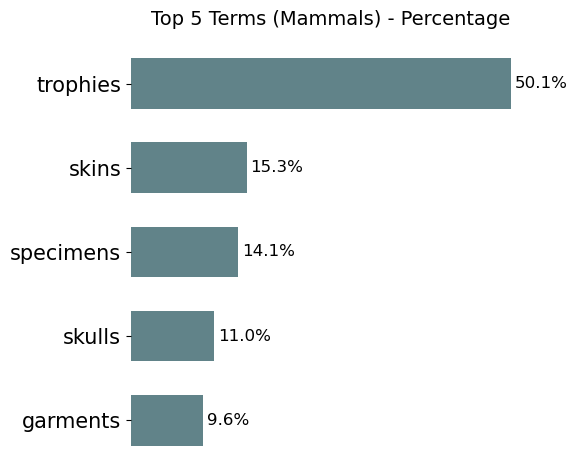

In [517]:
top5_terms = mammals_df.groupby('Term').size().reset_index(name='Transaction_Count')
top5_terms = top5_terms.sort_values(by='Transaction_Count', ascending=False).head(5)
top5_terms['Percentage'] = top5_terms['Transaction_Count'] / top5_terms['Transaction_Count'].sum() * 100

plt.figure(figsize=(6,5))
bars = plt.barh(top5_terms['Term'], top5_terms['Percentage'], color='#618389', height=0.6)
plt.gca().invert_yaxis()
plt.gca().spines[['top','right','left','bottom']].set_visible(False)
plt.gca().xaxis.set_visible(False)

for i, perc in enumerate(top5_terms['Percentage']):
    plt.text(perc + 0.5, i, f"{perc:.1f}%", va='center', fontsize=12)

plt.title("Top 5 Terms (Mammals) - Percentage", fontsize=14, pad=10)
plt.tight_layout()
plt.show()


## 8. Risk Assessment

### 8.1 Number of transactions by risk level

In [518]:
enforcement_counts = df['EnforcementWeaknessFinal'].value_counts().reset_index()
enforcement_counts.columns = ['EnforcementWeaknessFinal', 'Transaction_Count']
print(enforcement_counts)


  EnforcementWeaknessFinal  Transaction_Count
0                   Medium              83689
1                      Low              13049
2                 Critical               9699
3                     High               5960


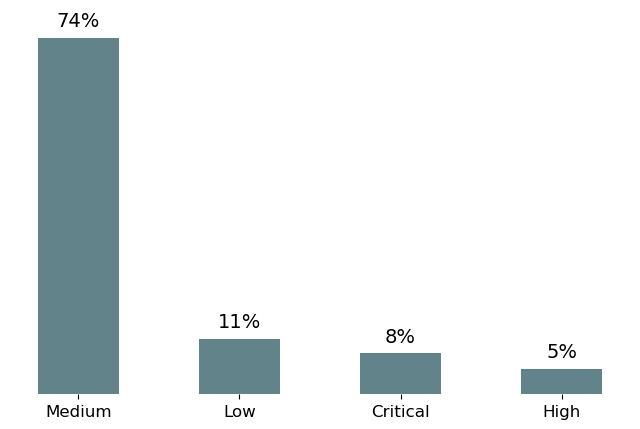

In [519]:
enforcement_counts['Percentage'] = enforcement_counts['Transaction_Count'] / enforcement_counts['Transaction_Count'].sum() * 100

plt.figure(figsize=(8,5))
bars = plt.bar(enforcement_counts['EnforcementWeaknessFinal'], enforcement_counts['Percentage'], color='#618389', width=0.5)
plt.xticks(rotation=0, ha='center', fontsize=12)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.gca().spines['bottom'].set_visible(False)
plt.gca().yaxis.set_visible(False)

offset = max(enforcement_counts['Percentage']) * 0.02
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + offset, f"{int(height)}%", ha='center', va='bottom', fontsize=14)

y_min = 0
y_max = enforcement_counts['Percentage'].max() * 1.08
plt.ylim(y_min, y_max)
plt.show()


### 8.2  Most Affected Species by Critical and Hight risk trade

In [520]:
critical_data = df[df['EnforcementWeaknessFinal'] == 'Critical']
top_englishnames_critical = critical_data['EnglishNames'].value_counts().head(10).reset_index()
top_englishnames_critical.columns = ['EnglishNames', 'Transaction_Count']
top_englishnames_critical


,EnglishNames,Transaction_Count
0,Panthera pardus,897
1,Large Hippo,832
2,African Elephant,653
3,Nile crocodile,585
4,Papio ursinus,484
5,Giraffe,440
6,Panthera leo,361
7,Equus zebra hartmannae,335
8,Ursus arctos,315
9,Caracal caracal,281


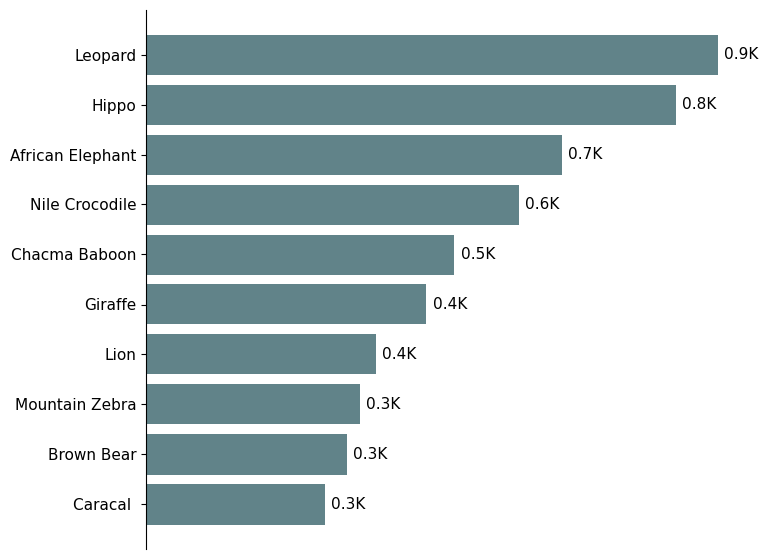

In [521]:
import matplotlib.pyplot as plt

data = {
    "English Name": [
        "Leopard",
        "Hippo",
        "African Elephant",
        "Nile Crocodile",
        "Chacma Baboon",
        "Giraffe",
        "Lion",
        "Mountain Zebra",
        "Brown Bear",
        "Caracal "
    ],
    "Transaction_Count": [897, 832, 653, 585, 484, 440, 361, 335, 315, 281]
}

names = data["English Name"]
counts = data["Transaction_Count"]

plt.figure(figsize=(10,7))
bars = plt.barh(names, counts, color="#618389", height=0.8)
plt.gca().invert_yaxis()

for bar in bars:
    width = bar.get_width()
    plt.text(width + 10, bar.get_y() + bar.get_height()/2, f"{width/1000:.1f}K",
             ha='left', va='center', fontsize=11)

plt.subplots_adjust(left=0.3)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['bottom'].set_visible(False)
plt.gca().xaxis.set_visible(False)

plt.xticks(fontsize=11)
plt.yticks(fontsize=11)
plt.show()


## 9. Hunting Trophies

### 9.1 Total Trophy Transactions including personal trophies

In [522]:
hunting_trophy_df = df[(df['Purpose_EN'] == 'Hunting trophy') | (df['Term'] == 'trophies')]

total_hunting_trophies = len(hunting_trophy_df)
percentage_hunting_trophies = total_hunting_trophies / len(df) * 100

print(f"Total Hunting trophy transactions: {total_hunting_trophies}")
print(f"Percentage of total transactions: {percentage_hunting_trophies:.2f}%")


Total Hunting trophy transactions: 15702
Percentage of total transactions: 13.97%


### 9.2 Number of affected species by trophy hunting trade

In [523]:
unique_taxon_hunting_trophies = hunting_trophy_df['Taxon'].nunique()
print(f"Number of unique Taxon affected by hunting trophies: {unique_taxon_hunting_trophies}")


Number of unique Taxon affected by hunting trophies: 223


### 9.3 Distribution of Hunting Trophy Transactions by Animal Class

In [524]:
hunting_trophy_df = df[(df['Purpose_EN'] == 'Hunting trophy') | (df['Term'].str.contains('trophies', case=False, na=False))]
class_counts = hunting_trophy_df.groupby('Class_EN').size().reset_index(name='Transaction_Count')
total_transactions = class_counts['Transaction_Count'].sum()
class_counts['Percentage'] = (class_counts['Transaction_Count'] / total_transactions * 100).round(2)
class_counts = class_counts.sort_values(by='Transaction_Count', ascending=False)
print(class_counts)


            Class_EN  Transaction_Count  Percentage
2            Mammals              14353       91.41
4           Reptiles               1108        7.06
0              Birds                239        1.52
1            Insects                  1        0.01
3  Ray-finned Fishes                  1        0.01


### 9.4 Top Affected Animals by trophy Trade

In [525]:
hunting_trophy_df = df[(df['Purpose_EN'] == 'Hunting trophy') | (df['Term'] == 'trophies')]
taxon_counts = hunting_trophy_df['EnglishNames'].value_counts()
top_5_taxon = taxon_counts.head(10)
print(top_5_taxon)

EnglishNames
African Elephant          1112
Large Hippo               1105
Papio ursinus              991
Giraffe                    911
Nile crocodile             911
Panthera pardus            871
American Black Bear        870
Equus zebra hartmannae     716
Ursus arctos               543
Panthera leo               465
Name: count, dtype: int64


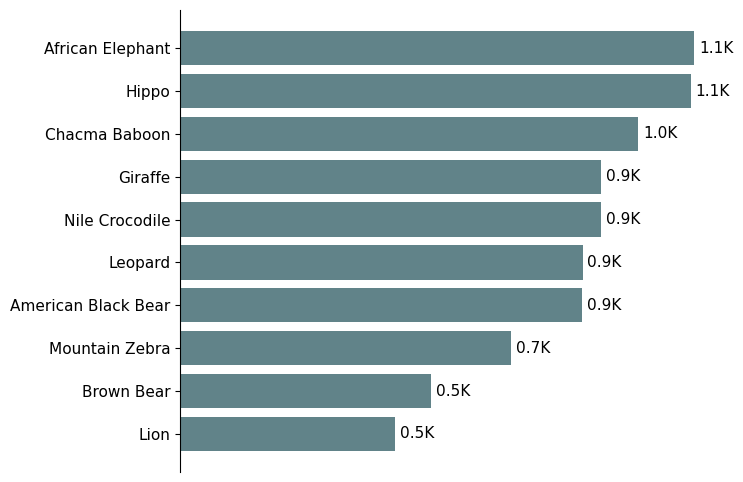

In [526]:
import matplotlib.pyplot as plt

data = {
    "English Name": [
        "African Elephant",
        "Hippo",
        "Chacma Baboon",
        "Giraffe",
        "Nile Crocodile",
        "Leopard",
        "American Black Bear",
        "Mountain Zebra",
        "Brown Bear",
        "Lion"
    ],
    "Transaction_Count": [1112, 1105, 991, 911, 911, 871, 870, 716, 543, 465]
}

names = data["English Name"]
counts = data["Transaction_Count"]

plt.figure(figsize=(9,6))
bars = plt.barh(names, counts, color="#618389")

plt.gca().invert_yaxis()

for bar in bars:
    width = bar.get_width()
    plt.text(width + 10, bar.get_y() + bar.get_height()/2, f"{width/1000:.1f}K",
             ha='left', va='center', fontsize=11)

plt.subplots_adjust(left=0.3)

plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['bottom'].set_visible(False)
plt.gca().xaxis.set_visible(False)

plt.xticks(fontsize=11)
plt.yticks(fontsize=11)

plt.show()


#### 9.5 Proportion of Hunting Trophy Transactions within Top 5 Animal Classes

In [527]:
hunting_trophy_df = df[(df['Purpose_EN'] == 'Hunting trophy') | (df['Term'] == 'trophies')]

top_5_classes = df['Class_EN'].value_counts().head(5).index

result = []
for cls in top_5_classes:
    class_total = len(df[df['Class_EN'] == cls])
    class_trophy = len(hunting_trophy_df[hunting_trophy_df['Class_EN'] == cls])
    percentage = (class_trophy / class_total) * 100 if class_total > 0 else 0
    result.append({'Class_EN': cls, 'Trophy_Percentage': percentage})

import pandas as pd
trophy_percentages = pd.DataFrame(result)

print(trophy_percentages)


          Class_EN  Trophy_Percentage
0         Reptiles           2.840516
1           Corals           0.000000
2          Mammals          49.348461
3            Birds           3.812410
4  Sharks and Rays           0.000000


## 10. The Arabian World

### 10.1 Trade Volume

In [528]:
arab_countries = [
    'Algeria', 'Bahrain', 'Comoros', 'Djibouti', 'Egypt', 'Iraq', 'Jordan',
    'Kuwait', 'Lebanon', 'Libya', 'Mauritania', 'Morocco', 'Oman', 'Palestine',
    'Qatar', 'Saudi Arabia', 'Somalia', 'Sudan', 'Syria', 'Tunisia',
    'United Arab Emirates', 'Yemen'
]

arab_transactions = df[
    (df['Exporter_EN'].isin(arab_countries)) | 
    (df['Importer_EN'].isin(arab_countries))
]

total_arab_transactions = len(arab_transactions)
total_arab_transactions

total_arab_transactions = len(arab_transactions)
percentage_arab_transactions = total_arab_transactions / len(df) * 100

total_arab_transactions, round(percentage_arab_transactions, 2)


(9107, 8.1)

### 10.2 Enforcement Weakness Distribution in Arab Countries’ Wildlife Trade

In [529]:
arab_trade = df[(df['Exporter_EN'].isin(arab_countries)) | (df['Importer_EN'].isin(arab_countries))]

enforcement_counts = arab_trade['EnforcementWeaknessFinal'].value_counts(normalize=True).reset_index()
enforcement_counts.columns = ['EnforcementWeaknessFinal', 'Percentage']

order = ['Low', 'Medium', 'High', 'Critical']
enforcement_counts['EnforcementWeaknessFinal'] = pd.Categorical(enforcement_counts['EnforcementWeaknessFinal'], categories=order, ordered=True)
enforcement_counts = enforcement_counts.sort_values('EnforcementWeaknessFinal')

enforcement_counts['Percentage'] = (enforcement_counts['Percentage'] * 100).round(0).astype(int)

print(enforcement_counts.to_string(index=False))


EnforcementWeaknessFinal  Percentage
                     Low           8
                  Medium          85
                    High           2
                Critical           5


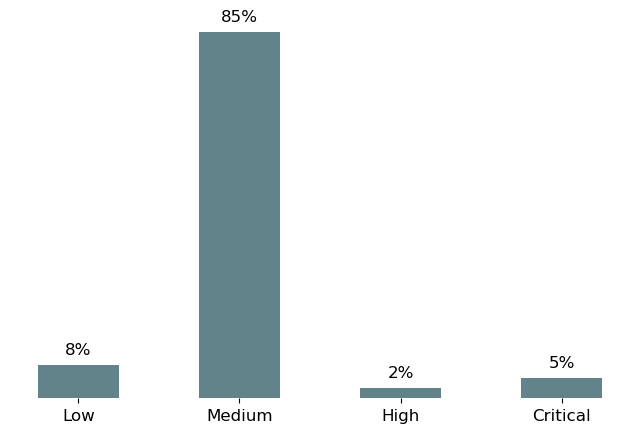

In [530]:
arab_countries = [
    'Algeria', 'Bahrain', 'Comoros', 'Djibouti', 'Egypt', 'Iraq', 'Jordan',
    'Kuwait', 'Lebanon', 'Libya', 'Mauritania', 'Morocco', 'Oman', 'Palestine',
    'Qatar', 'Saudi Arabia', 'Somalia', 'Sudan', 'Syria', 'Tunisia',
    'United Arab Emirates', 'Yemen'
]

arab_trade = df[(df['Exporter_EN'].isin(arab_countries)) | (df['Importer_EN'].isin(arab_countries))]

enforcement_counts = arab_trade['EnforcementWeaknessFinal'].value_counts(normalize=True).reset_index()
enforcement_counts.columns = ['EnforcementWeaknessFinal', 'Percentage']

order = ['Low', 'Medium', 'High', 'Critical']
enforcement_counts['EnforcementWeaknessFinal'] = pd.Categorical(enforcement_counts['EnforcementWeaknessFinal'], categories=order, ordered=True)
enforcement_counts = enforcement_counts.sort_values('EnforcementWeaknessFinal')

plt.figure(figsize=(8,5))
bars = plt.bar(enforcement_counts['EnforcementWeaknessFinal'], enforcement_counts['Percentage'], color='#618389', width=0.5)

offset = max(enforcement_counts['Percentage']) * 0.02
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + offset, f"{height*100:.0f}%",
             ha='center', va='bottom', fontsize=12)

plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.gca().spines['bottom'].set_visible(False)
plt.gca().yaxis.set_visible(False)
plt.xticks(fontsize=12)
plt.show()


## 10.3 Top Expotrer

In [531]:
arab_countries = [
    'Algeria', 'Bahrain', 'Comoros', 'Djibouti', 'Egypt', 'Iraq', 'Jordan',
    'Kuwait', 'Lebanon', 'Libya', 'Mauritania', 'Morocco', 'Oman', 'Palestine',
    'Qatar', 'Saudi Arabia', 'Somalia', 'Sudan', 'Syria', 'Tunisia',
    'United Arab Emirates', 'Yemen'
]


arab_exports = df[df['Exporter_EN'].isin(arab_countries)]


top_arab_exporters = (
    arab_exports.groupby('Exporter_EN')
    .size()
    .reset_index(name='Transaction_Count')
    .sort_values(by='Transaction_Count', ascending=False)
    .head()
)

top_arab_exporters


,Exporter_EN,Transaction_Count
18,United Arab Emirates,721
6,Kuwait,352
12,Qatar,265
13,Saudi Arabia,212
11,Oman,201


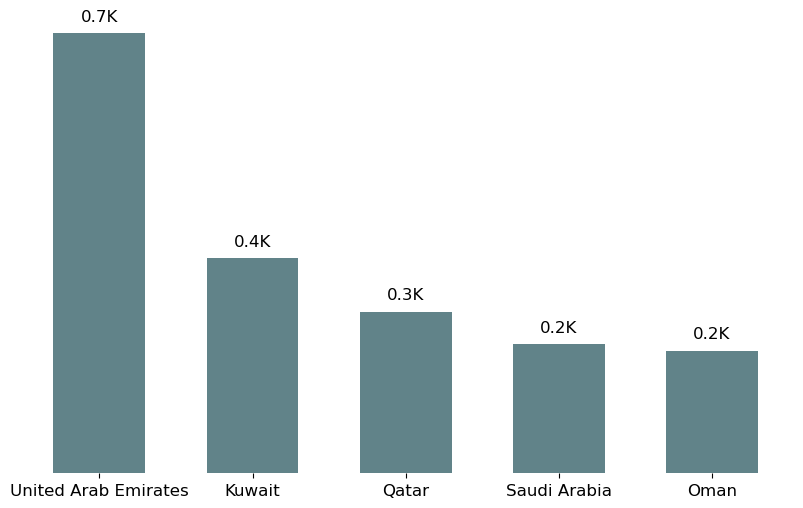

In [532]:
import matplotlib.pyplot as plt

arab_countries = [
    'Algeria', 'Bahrain', 'Comoros', 'Djibouti', 'Egypt', 'Iraq', 'Jordan',
    'Kuwait', 'Lebanon', 'Libya', 'Mauritania', 'Morocco', 'Oman', 'Palestine',
    'Qatar', 'Saudi Arabia', 'Somalia', 'Sudan', 'Syria', 'Tunisia',
    'United Arab Emirates', 'Yemen'
]

arab_exports = df[df['Exporter_EN'].isin(arab_countries)]

top5_arab_exporters = (
    arab_exports.groupby('Exporter_EN')
    .size()
    .reset_index(name='Transaction_Count')
    .sort_values(by='Transaction_Count', ascending=False)
    .head(5)
)

names = top5_arab_exporters['Exporter_EN']
counts = top5_arab_exporters['Transaction_Count']

plt.figure(figsize=(10,6))
bars = plt.bar(names, counts, color="#618389", width=0.6)

offset = max(counts) * 0.02
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + offset, f"{height/1000:.1f}K",
             ha='center', va='bottom', fontsize=12)

plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.gca().spines['bottom'].set_visible(False)
plt.gca().yaxis.set_visible(False)

plt.xticks(fontsize=12)
plt.show()


### 10.4 Top importers

In [533]:
arab_countries = [
    'Algeria', 'Bahrain', 'Comoros', 'Djibouti', 'Egypt', 'Iraq', 'Jordan',
    'Kuwait', 'Lebanon', 'Libya', 'Mauritania', 'Morocco', 'Oman', 'Palestine',
    'Qatar', 'Saudi Arabia', 'Somalia', 'Sudan', 'Syria', 'Tunisia',
    'United Arab Emirates', 'Yemen'
]

arab_imports = df[df['Importer_EN'].isin(arab_countries)]

top_arab_importers = (
    arab_imports.groupby('Importer_EN')
    .size()
    .reset_index(name='Transaction_Count')
    .sort_values(by='Transaction_Count', ascending=False)
    .head(10)
)

top_arab_importers


,Importer_EN,Transaction_Count
16,United Arab Emirates,2425
5,Kuwait,1031
11,Qatar,939
12,Saudi Arabia,860
1,Bahrain,505
4,Jordan,366
6,Lebanon,272
3,Iraq,232
10,Oman,205
9,Morocco,190


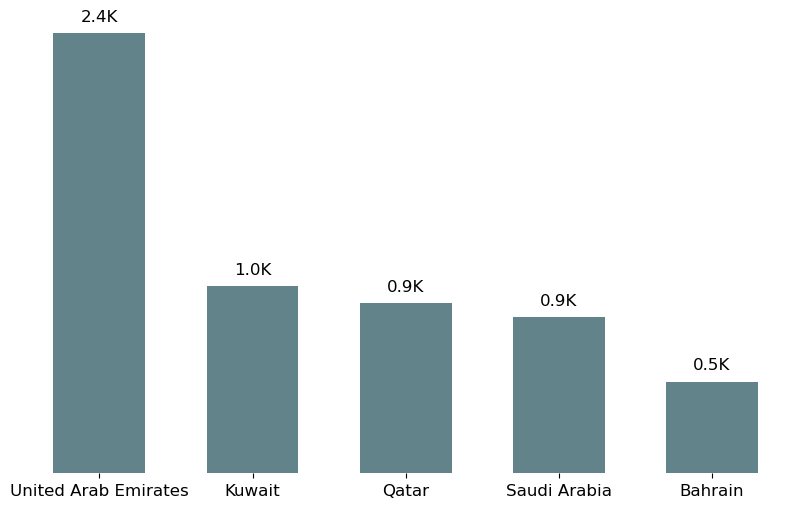

In [534]:
import matplotlib.pyplot as plt

arab_countries = [
    'Algeria', 'Bahrain', 'Comoros', 'Djibouti', 'Egypt', 'Iraq', 'Jordan',
    'Kuwait', 'Lebanon', 'Libya', 'Mauritania', 'Morocco', 'Oman', 'Palestine',
    'Qatar', 'Saudi Arabia', 'Somalia', 'Sudan', 'Syria', 'Tunisia',
    'United Arab Emirates', 'Yemen'
]

arab_imports = df[df['Importer_EN'].isin(arab_countries)]

top5_arab_importers = (
    arab_imports.groupby('Importer_EN')
    .size()
    .reset_index(name='Transaction_Count')
    .sort_values(by='Transaction_Count', ascending=False)
    .head(5)
)

names = top5_arab_importers['Importer_EN']
counts = top5_arab_importers['Transaction_Count']

plt.figure(figsize=(10,6))
bars = plt.bar(names, counts, color="#618389", width=0.6)

offset = max(counts) * 0.02
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + offset, f"{height/1000:.1f}K",
             ha='center', va='bottom', fontsize=12)

plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.gca().spines['bottom'].set_visible(False)
plt.gca().yaxis.set_visible(False)

plt.xticks(fontsize=12)
plt.show()


## 10.5 Top Traded Species

In [535]:
import pandas as pd

arab_countries = [
    'Algeria', 'Bahrain', 'Comoros', 'Djibouti', 'Egypt', 'Iraq', 'Jordan',
    'Kuwait', 'Lebanon', 'Libya', 'Mauritania', 'Morocco', 'Oman', 'Palestine',
    'Qatar', 'Saudi Arabia', 'Somalia', 'Sudan', 'Syria', 'Tunisia',
    'United Arab Emirates', 'Yemen'
]

arab_trade = df[(df['Exporter_EN'].isin(arab_countries)) | (df['Importer_EN'].isin(arab_countries))]

top5_species = arab_trade['EnglishNames'].value_counts().head(5).reset_index()
top5_species.columns = ['EnglishNames', 'Transaction_Count']

top5_species


,EnglishNames,Transaction_Count
0,American alligator,1128
1,Asian water monitor,692
2,Asian python,653
3,Nile monitor,318
4,Lama vicugna,260


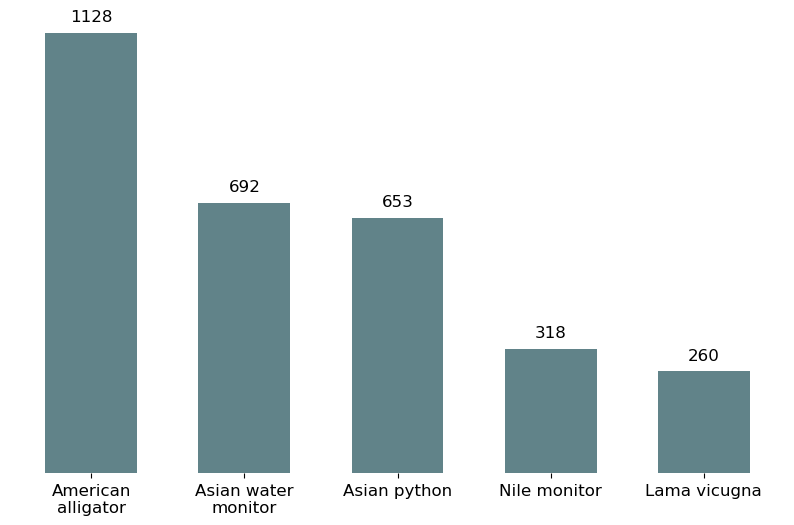

In [536]:
import matplotlib.pyplot as plt
import pandas as pd
import textwrap

arab_countries = [
    'Algeria', 'Bahrain', 'Comoros', 'Djibouti', 'Egypt', 'Iraq', 'Jordan',
    'Kuwait', 'Lebanon', 'Libya', 'Mauritania', 'Morocco', 'Oman', 'Palestine',
    'Qatar', 'Saudi Arabia', 'Somalia', 'Sudan', 'Syria', 'Tunisia',
    'United Arab Emirates', 'Yemen'
]

arab_trade = df[(df['Exporter_EN'].isin(arab_countries)) | (df['Importer_EN'].isin(arab_countries))]

top5_species = arab_trade['EnglishNames'].value_counts().head(5).reset_index()
top5_species.columns = ['EnglishNames', 'Transaction_Count']

wrapped_names = [textwrap.fill(name, width=15) for name in top5_species['EnglishNames']]

plt.figure(figsize=(10,6))
bars = plt.bar(wrapped_names, top5_species['Transaction_Count'], color="#618389", width=0.6)

offset = max(top5_species['Transaction_Count']) * 0.02
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + offset, f"{height}",
             ha='center', va='bottom', fontsize=12)

plt.xticks(fontsize=12)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.gca().spines['bottom'].set_visible(False)
plt.gca().yaxis.set_visible(False)
plt.show()


### 10.6  Top Specied originated from Arab Counties & Traded globaly

In [537]:
arab_origins = df[df['Origin_EN'].isin(arab_countries)]

top10_arab_animals = (
    arab_origins.groupby(['EnglishNames', 'Threat_Status'])
    .size()
    .reset_index(name='Transaction_Count')
    .sort_values(by='Transaction_Count', ascending=False)
    .head(10)
)

print(top10_arab_animals)


                                          EnglishNames Threat_Status  \
192                                       Nile monitor    Vulnerable   
90   Common eel, Eel, European eel, River eel, Silv...    Vulnerable   
25                                 African grey parrot    Endangered   
156                                         Mako Shark    Vulnerable   
117                                    Felis margarita    Vulnerable   
248                                        Silky shark    Vulnerable   
105                                    Falco biarmicus    Vulnerable   
70                             Carcharhinus longimanus    Vulnerable   
268                                   Uromastyx dispar    Vulnerable   
62                             Bronze hammerhead shark    Vulnerable   

     Transaction_Count  
192                413  
90                 107  
25                  38  
156                 35  
117                 34  
248                 31  
105                 28  
70     

"The African Grey Parrot does not naturally originate from any Arab country. Its presence in these countries is due to re-exporting, and therefore, these records have been excluded from this graph to accurately reflect the species' origin distribution."

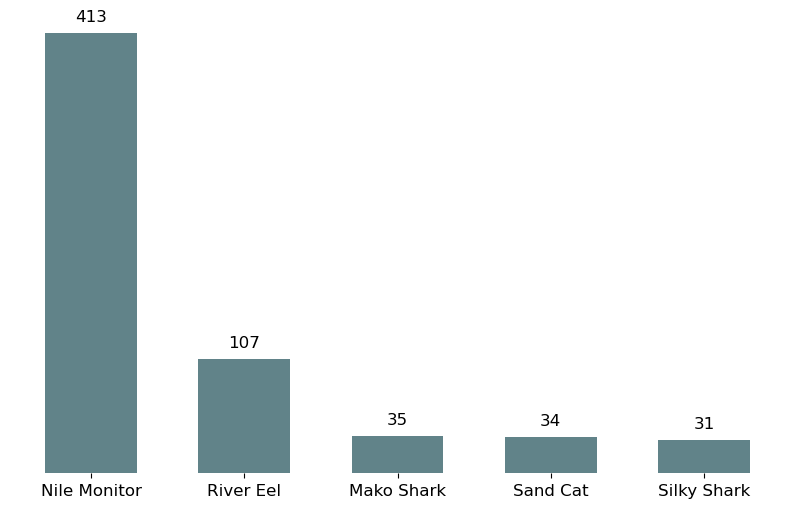

In [538]:
import matplotlib.pyplot as plt
import pandas as pd

common_names = {
    "Nile Monitor": "Nile Monitor",
    "Common Eel": "River Eel", 
    "Mako Shark": "Mako Shark",
    "Felis Margarita": "Sand Cat",
    "Silky Shark": "Silky Shark",
    "Falco Biarmicus": "Lanner Falcon",
    "Uromastyx Dispar": "Desert Spiny-tailed Lizard",
    "Carcharhinus Longimanus": "Oceanic Whitetip Shark",
    "Bronze Hammerhead Shark": "Bronze Hammerhead Shark"
}

data = {
    "EnglishNames": [
        "Nile Monitor",
        "Common Eel",
        "Mako Shark",
        "Felis Margarita",
        "Silky Shark",
        "Falco Biarmicus",
        "Uromastyx Dispar",
        "Carcharhinus Longimanus",
        "Bronze Hammerhead Shark"
    ],
    "Transaction_Count": [413, 107, 35, 34, 31, 28, 27, 27, 26]
}

df_plot = pd.DataFrame(data)
df_plot['CommonName'] = df_plot['EnglishNames'].replace(common_names)

top5_df = df_plot.sort_values('Transaction_Count', ascending=False).head(5)

plt.figure(figsize=(10,6))
bars = plt.bar(top5_df['CommonName'], top5_df['Transaction_Count'], color="#618389", width=0.6)

offset = max(top5_df['Transaction_Count']) * 0.02
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + offset, f"{height}",
             ha='center', va='bottom', fontsize=12)

plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.gca().spines['bottom'].set_visible(False)
plt.gca().yaxis.set_visible(False)
plt.xticks(fontsize=12)
plt.show()


### 10.7 Share of Hunting Trophy Trade Involving Arab Countries

In [539]:
arab_countries = [
    'Algeria', 'Bahrain', 'Comoros', 'Djibouti', 'Egypt', 'Iraq', 'Jordan',
    'Kuwait', 'Lebanon', 'Libya', 'Mauritania', 'Morocco', 'Oman', 'Palestine',
    'Qatar', 'Saudi Arabia', 'Somalia', 'Sudan', 'Syria', 'Tunisia',
    'United Arab Emirates', 'Yemen'
]

trophy_df = df[
    (df['Purpose_EN'] == 'Hunting trophy') | 
    (df['Term'].str.contains('trophies', case=False, na=False))
]

arab_trophy = trophy_df[
    (trophy_df['Exporter_EN'].isin(arab_countries)) | 
    (trophy_df['Importer_EN'].isin(arab_countries))
]

arab_trophy_percentage = len(arab_trophy) / len(trophy_df) * 100

arab_summary = pd.DataFrame({
    'Region': ['Arab Countries'],
    'Trophy_Trade_Percentage': [round(arab_trophy_percentage, 2)]
})

arab_summary


,Region,Trophy_Trade_Percentage
0,Arab Countries,2.31


# 11. Bahrain

### 11.1 Bahrain Risk level (Enforcement Weakness )

In [540]:
bahrain_transactions = df[
    (df['Exporter_EN'] == 'Bahrain') | 
    (df['Importer_EN'] == 'Bahrain')
]

bahrain_enforcement_counts = (
    bahrain_transactions['EnforcementWeaknessFinal']
    .value_counts()
    .reset_index()
)
bahrain_enforcement_counts.columns = ['EnforcementWeaknessFinal', 'Transaction_Count']
print(bahrain_enforcement_counts)


  EnforcementWeaknessFinal  Transaction_Count
0                   Medium                520
1                 Critical                 21
2                     High                  5
3                      Low                  5


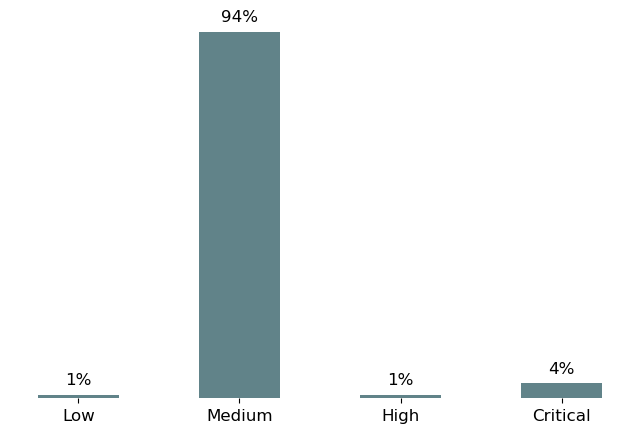

In [541]:
import pandas as pd
import matplotlib.pyplot as plt

bahrain_trade = df[(df['Exporter_EN'] == 'Bahrain') | (df['Importer_EN'] == 'Bahrain')]

enforcement_counts = bahrain_trade['EnforcementWeaknessFinal'].value_counts(normalize=True).reset_index()
enforcement_counts.columns = ['EnforcementWeaknessFinal', 'Percentage']

order = ['Low', 'Medium', 'High', 'Critical']
enforcement_counts['EnforcementWeaknessFinal'] = pd.Categorical(
    enforcement_counts['EnforcementWeaknessFinal'], categories=order, ordered=True
)
enforcement_counts = enforcement_counts.sort_values('EnforcementWeaknessFinal')

plt.figure(figsize=(8,5))
bars = plt.bar(
    enforcement_counts['EnforcementWeaknessFinal'], 
    enforcement_counts['Percentage'], 
    color='#618389', 
    width=0.5
)

offset = max(enforcement_counts['Percentage']) * 0.02
for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width()/2, 
        height + offset, 
        f"{height*100:.0f}%",
        ha='center', 
        va='bottom', 
        fontsize=12
    )

plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.gca().spines['bottom'].set_visible(False)
plt.gca().yaxis.set_visible(False)
plt.xticks(fontsize=12)
plt.show()


### 11.2 Top 10 Imported Species in Bahrain

In [542]:
bahrain_imports = df[df['Importer_EN'] == 'Bahrain']

top10_bahrain_imports = (
    bahrain_imports.groupby('EnglishNames')
    .size()
    .reset_index(name='Transaction_Count')
    .sort_values(by='Transaction_Count', ascending=False)
    .head(10)
)

top10_bahrain_imports


,EnglishNames,Transaction_Count
13,American alligator,57
23,Asian water monitor,34
22,Asian python,26
102,Nile monitor,18
127,Stony corals,13
73,Green winged Macaw,11
139,Yellow crowned Amazon,8
34,Caiman crocodilus yacare,8
5,African Elephant,8
27,Blue gold Macaw,7


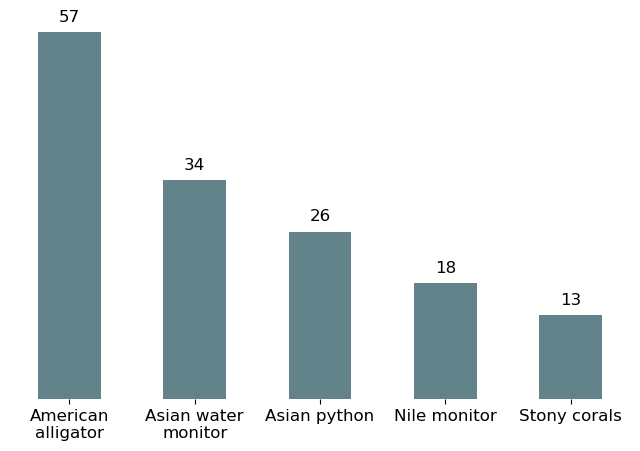

In [543]:
import matplotlib.pyplot as plt
import textwrap

top5_bahrain_imports = top10_bahrain_imports.head(5)

plt.figure(figsize=(8,5))
bars = plt.bar(top5_bahrain_imports['EnglishNames'], top5_bahrain_imports['Transaction_Count'], color='#618389', width=0.5)

offset = max(top5_bahrain_imports['Transaction_Count']) * 0.02
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + offset, f"{height}", 
             ha='center', va='bottom', fontsize=12)

plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.gca().spines['bottom'].set_visible(False)
plt.gca().yaxis.set_visible(False)

# Wrap x-axis labels
wrapped_labels = [textwrap.fill(label, 12) for label in top5_bahrain_imports['EnglishNames']]
plt.xticks(range(len(wrapped_labels)), wrapped_labels, fontsize=12)

plt.show()


### 11.2 Top Exported Species in Bahrain

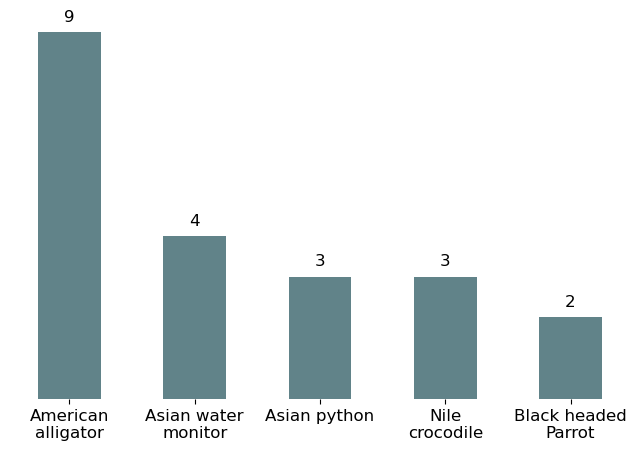

In [544]:

top10_bahrain_exports = df[df['Exporter_EN'] == 'Bahrain'].groupby('EnglishNames') \
                        .size().reset_index(name='Transaction_Count') \
                        .sort_values(by='Transaction_Count', ascending=False).head(10)

top10_bahrain_exports


top5_bahrain_exports = top10_bahrain_exports.head(5)

plt.figure(figsize=(8,5))
bars = plt.bar(top5_bahrain_exports['EnglishNames'], top5_bahrain_exports['Transaction_Count'], color='#618389', width=0.5)

offset = max(top5_bahrain_exports['Transaction_Count']) * 0.02
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + offset, f"{height}", 
             ha='center', va='bottom', fontsize=12)

plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.gca().spines['bottom'].set_visible(False)
plt.gca().yaxis.set_visible(False)

wrapped_labels = [textwrap.fill(label, 12) for label in top5_bahrain_exports['EnglishNames']]
plt.xticks(range(len(wrapped_labels)), wrapped_labels, fontsize=12)

plt.show()


In [545]:
top10_bahrain_exports.reset_index(drop=True)

,EnglishNames,Transaction_Count
0,American alligator,9
1,Asian water monitor,4
2,Asian python,3
3,Nile crocodile,3
4,Black headed Parrot,2
5,Aratinga leucophthalma,2
6,Caiman crocodilus,2
7,African grey parrot,2
8,Tursiops truncatus,2
9,Diopsittaca nobilis,2


### 11.3 Share of Hunting Trophy Trade Involving Bahrain

In [546]:
trophy_df = df[
    (df['Purpose_EN'] == 'Hunting trophy') | 
    (df['Term'].str.contains('trophies', case=False, na=False))
]

bahrain_trophy = trophy_df[
    (trophy_df['Exporter_EN'] == 'Bahrain') | 
    (trophy_df['Importer_EN'] == 'Bahrain')
]

bahrain_trophy_percentage = len(bahrain_trophy) / len(trophy_df) * 100

bahrain_summary = pd.DataFrame({
    'Region': ['Bahrain'],
    'Trophy_Trade_Percentage': [round(bahrain_trophy_percentage, 2)]
})

bahrain_summary


,Region,Trophy_Trade_Percentage
0,Bahrain,0.12


# Key findings & Insights

### 1. Trade Volumes and Trends
- Global trade levels of wild-sourced animals are relatively stable, with a slight decrease over the five years (2019–2023).  
- **Reptiles** are the most traded group, followed by **Corals**, **Mammals**, **Birds**, and **Sharks & Rays**.  
- Transaction types show that most trades involve **Manufactured Products (36.8%)**, **Live Specimens (33.5%)**, and **Raw Body Parts (21.5%)**, while Food Products and Processed Materials are minor contributors.  
- **Commercial purposes** dominate the trade (**68.8%**), whereas **hunting trophies** account for **12.6%** of total transactions.  
- **Arab countries are involved in 8.1% of global trade** either as exporters or importers.  
- **Bahrain's trade** is largely medium risk (**94%**), with Critical (**4%**), High (**1%**), and Low (**1%**) risk transactions.  

**Insight:** Global trade is substantial and concentrated in specific animal groups and transaction types, and Arab countries contribute a measurable share, highlighting stable demand patterns with slight decreases. Bahrain follows the same risk pattern as global trends, predominantly medium risk.

---

### 2. Key Animals and Leading Countries
- Top traded species include **American Alligator**, **Asian Water Monitor**, **Asian Python**, **Nile Monitor**, and **Lama Vicugna**.  
- The **United States** is the largest importer, while **Indonesia and Australia** are the largest exporters.  
- **Arab countries such as UAE, Kuwait, Qatar, Saudi Arabia, and Oman are active exporters**, contributing to regional trade dynamics and demonstrating their role in the global wildlife trade.  
- **Bahrain imports** top species:  
  - **American Alligator (57 transactions)**  
  - **Asian Water Monitor (34)**  
  - **Asian Python (26)**  
  - **Nile Monitor (18)**  
  - **Stony Corals (13)**  
- **Bahrain's top exports** include:  
  - **American Alligator (9)**  
  - **Asian Water Monitor (4)**  
  - **Asian Python (3)**  
  - **Nile Crocodile (3)**  
  - **Black-headed Parrot (2)**  

**Insight:** Trade is concentrated in a few species and leading countries, including key Arab exporters. Bahrain shows measurable activity in both imports and exports, indicating its contribution to regional trade dynamics.

---

### 3. Distribution of Trade Pressures
- **Reptiles experience strong commercial demand**, particularly for leather products and live specimens.  
- **American Alligator alone represents 8% of total global trade**, indicating significant pressure on this species.  
- **Mammals face the highest pressure from trophy hunting**, especially elephants, hippos, large primates, and crocodiles.  
- Trade pressure is uneven globally, with key origin countries like **Indonesia, Australia, United States, Canada, and South Africa** carrying disproportionately high volumes and environmental sensitivity.  
- In the **Arab world, species like American Alligator, Nile Monitor, and Asian Python are the most traded**, highlighting localized pressure even in low-volume regional markets.  
- **In Bahrain**, reptiles dominate trade pressure with American Alligator and Nile Monitor at the top, followed by Asian Python and Asian Water Monitor. Stony corals also contribute to pressure on marine species.  

**Insight:** Trade and environmental pressure are concentrated among certain species and origin countries, including Arab regions and Bahrain specifically, emphasizing areas where species are at risk of overexploitation.

---

### 4. Risk Assessment
- Most transactions occur under **Medium risk (85%)**, while **Critical risk represents 5%** and **High risk 2%**.  
- Risk is concentrated among **high-volume exporters** and **high-demand species**, requiring targeted monitoring.  
- Arabian world trade shows similar risk patterns, with 85% of transactions Medium risk, 5% Critical, and 2% High, highlighting that trade within or through Arab countries follows global risk trends.  
- **Bahrain mirrors this distribution**, with Medium risk (**94%**), Critical (**4%**), High (**1%**), and Low (**1%**) transactions.  

**Insight:** The distribution of risk percentages indicates priority areas for monitoring, particularly in regions with high trade volumes or sensitive species. Bahrain’s trade aligns closely with global and regional risk patterns.

---

### 5. Ethical Considerations
- **91.4% of hunting trophy transactions involve mammals**, reflecting substantial pressure on this group.  
- **Trophy hunting accounts for 49% of mammal trade**, raising ethical concerns about recreational or personal hunting.  
- Species most affected include **African Elephant, Hippopotamus, Chacma Baboon, Giraffe, and Nile Crocodile**.  
- **American Alligator, elephants, and hippos are under disproportionate trade pressure** due to both commercial and trophy hunting.  
- **Bahrain’s trophy hunting share is 0.12%**, whereas the wider **Arab countries account for 2.31%** of trophy trade transactions, showing that the region participates in hunting activities but at relatively low levels.  

**Insight:** Trophy hunting and high-volume commercial trade raise ethical and conservation concerns, particularly for mammals and specific high-demand species. Bahrain contributes a minor share to regional trophy hunting, but monitoring is still essential for species protection.


# Recommendation

-  **Strengthen monitoring and transparency in trade:**  
Implement strict reporting and tracking of high-risk species, and maintain transparent trade flows. Policy makers and regulatory authorities can use this data to focus on species under significant pressure, including **American Alligator, elephants, and hippos**, ensuring compliance and ethical trade practices.

- **Implement strict reporting and tracking** of high-risk species including **Origin country, Purpose, and Term of trade**, while maintaining transparent trade flows. Policy makers and regulatory authorities can use this data to focus on species under significant pressure, including **American Alligator, elephants, and hippos**, ensuring compliance and ethical trade practices.


- **Prioritize protection of high-risk species:**  
Take targeted measures to restrict or control trade in species facing disproportionate pressure from commercial and trophy hunting. Focus on **trophy-hunted mammals** (African Elephant, Hippopotamus, Chacma Baboon, Giraffe, Nile Crocodile) and **high-demand commercial reptiles** (American Alligator, Asian Water Monitor, Asian Python).

- **Focus on regional conservation priorities:**  
Even in low-volume markets like the **Arab world**, species native to the region—such as Nile Monitor, American Alligator, and Asian Python—are heavily traded. Regulators and environmental groups should implement policies to prevent overexploitation and maintain local population sustainability.

- **Integrate risk-based decision making:**  
Prioritize monitoring and enforcement efforts on **Critical and High  risk transactions, species, and origin countries**, while maintaining oversight for **Medium** and **Low** risk trades. This ensures that CITES authorities and regulators allocate resources effectively, focusing on the highest threats first without neglecting broader compliance.

- **Enhance regulatory enforcement globally, including Arab countries:**  
Even though regional trade in Arab countries represents only **8.1% of global trade**, all countries involved in wildlife trade—exporters and importers—should strengthen customs, inspections, and reporting. This helps CITES authorities and regulators reduce unsustainable trade and mitigate pressure on high-demand species worldwide.

- **Optimize CITES permit allocation:**  
While most trade occurs legally under CITES permits, authorities should improve the permit system by **reducing or suspending Commercial and Trophy permits for high-risk species or transactions**, prioritizing conservation and reducing pressure on vulnerable populations. Low- and medium-risk trades can continue under monitoring to ensure compliance and sustainability.

- **Raise awareness and build capacity:**  
Provide training for customs officers, wildlife authorities, and trade participants to identify high-risk species and ensure ethical, sustainable trade practices. Advocacy groups can support education campaigns to raise public awareness about the conservation and ethical impacts of wildlife trade.

- **Address ethical concerns in wildlife trade:**  
Implement policies and guidelines to minimize ethical issues associated with trophy hunting and high-demand commercial species. CITES authorities, regulators, and advocacy groups should ensure that species are not exploited solely for recreation or profit, and promote practices that consider animal welfare alongside conservation priorities.



# Limitations

- **Data Limitations:**  
The dataset lacks detailed information on individual CITES permits and does not provide the exact value of transactions. Additionally, only the year of each trade is recorded, without specific dates, limiting temporal precision in trend analysis.

- **Potential Underreporting:**  
Not all Parties submit complete or timely annual reports, and some may miss reporting due to internal issues. Consequently, actual trade volumes may be higher than recorded, and the most recent comprehensive data is typically two years old.

- **Origin Country Misreporting:**  
Occasionally, the reported origin country may reflect the re-exporting country rather than the species’ true origin. For example, an African Grey Parrot might be exported from Bahrain but actually originates from Africa, affecting the accuracy of origin-based analyses.







# References

## 1. CITES Data Sources
- [CITES Trade Database](https://trade.cites.org/) (n.d.). Retrieved October 7, 2025.
- [CITES Checklist](https://checklist.cites.org/#/en) (n.d.). Retrieved October 7, 2025.

## 2. CITES Official Documents and Guidance
- [Permit system](https://cites.org/eng/prog/Permit_system) (CITES, n.d.). Retrieved October 7, 2025.
- [How CITES works](https://cites.org/eng/disc/how.php) (CITES, n.d.). Retrieved October 7, 2025.
- [Appendices I, II and III](https://cites.org/sites/default/files/eng/app/2023/E-Appendices-2023-05-21.pdf) (CITES, 2023, May 21). Retrieved October 7, 2025.
- [Purpose code](https://cites.org/eng/node/131005) (CITES, n.d.). Retrieved October 7, 2025.
- [Resolution Conf. 12.3 (Rev. CoP19): Permits and certificates](https://cites.org/sites/default/files/documents/E-Res-12-03-R19.pdf) (CITES, 2022, Nov 22). Retrieved October 7, 2025.
- [Source code](https://cites.org/eng/node/131004) (CITES, n.d.). Retrieved October 7, 2025.
- [Appendices I, II and III](https://cites.org/sites/default/files/eng/app/2025/E-Appendices-2025-02-07.pdf) (CITES, 2025, Feb 7). Retrieved October 7, 2025.
- [Livelihoods](https://cites.org/eng/prog/livelihoods) (CITES, n.d.). Retrieved October 7, 2025.

## 3. Additional Taxonomic References
- [Integrated Taxonomic Information System (ITIS)](https://www.itis.gov/) (n.d.). Retrieved October 7, 2025.

## 4. General Sources (Used for Background Understanding Before Analysis)
- [The impact of trade on cheetah and leopard](https://www.krugerpark.co.za/krugerpark-times-e-9-impact-of-trade-on-cheetah-and-leopard-25343.html) (Kruger Park, 2011, June 30).  
- [Does trophy hunting of Kashmir markhor really contribute to its conservation?](https://www.researchgate.net/publication/359669560_DOES_TROPHY_HUNTING_OF_KASHMIR_MARKHOR_REALLY_CONTRIBUTING_IN_ITS_CONSERVATION) (Jameel, M. A., Tabassum, S., Mehmood, S., Shah, T., & colleagues, 2022). *International Journal of Conservation Science, 10*(3), 525–532.
- [India’s use of CITES Appendix III](https://doi.org/10.3897/natureconservation.44.63688) (Heinrich, S., Shepherd, C. R., & Nijman, V., 2021). *Nature Conservation, 44*, 163–176.
- [Missing Sharks II: Inconsistent reporting of shark and ray trade data undermines conservation](https://www.traffic.org/news/missing-sharks-ii/) (TRAFFIC, 2024, July 20).
- [Trophy hunting helps conservation? The industry’s biggest myths debunked](https://www.eurogroupforanimals.org/news/trophy-hunting-helps-conservation-industrys-biggest-myths-debunked) (Eurogroup for Animals, 2024, Jan 18).
- [CITES rejects trade controls for overharvested corals](https://www.traffic.org/news/cites-rejects-trade-controls-for-overharvested-corals/) (TRAFFIC, 2010, Mar 21).

